# Gender Recognition by Voice and Speech Analysis


<center><img src="https://raw.githubusercontent.com/AnkitNigam1985/Data-Science-Projects/master/ML%20Projects/Gender%20Speech%20recognition/Image.png"></center>

# Table of Contents

1. [Data Description](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Importing the libraries](#Section3)<br>
4. [Reading the data](#Section4)<br>
5. [Column information and missing value check](#Section5)<br>
6. [Data pre-profiling](#Section6)<br>
7. [Outlier checking](#Section7)<br>
8. [Distribution of the data](#Section8)<br>
9. [Correlation between columns](#Section9)<br>
10. [Analysis on invidual category - male](#Section10)<br>
  10.1 [Outliers checking for label - male](#Section101)<br>
  10.2 [Data distribution for label - male](#Section102)<br>
  10.3 [Correlated columns for label - male](#Section103)<br>
11. [Analysis on invidual category - female](#Section11)<br>
  11.1 [Outliers checking for label - female](#Section111)<br>
  11.2 [Data distribution for label - female](#Section112)<br>
  11.3 [Correlated columns for label - female](#Section113)<br>
12. [Observations from analysis om the dataset](#Section12)<br>
  12.1 [Columns kurtosis comparison with individual label data](#Section121)<br>
  12.2 [Columns skewness comparison with individual label data](#Section122)<br>
  12.3 [Column correlation comparison with individual label outliers](#Section123)<br>
  12.4 [Outlier comparison with individual label outliers](#Section124)<br>
13. [Data Preprocessing](#Section13)<br>
  13.1 [Dropping Outliers](#Section131)<br>
  13.2 [Dropping highly correlated columns](#Section132)<br>
14. [Data Post-profiling](#Section14)<br>
15. [Data Modelling](#Section15)<br>
  15.1 [Determining the appropriate number of components for PCA](#Section151)<br>
  15.2 [Pipelines for ML models training and prediction - baseline models](#Section152)<br>
    15.2.1 [Observation from baseline models performance](#Section1521)<br>
  15.3 [Pipelines for ML models training and prediction - Parameterized models](#Section153)<br>
    15.3.1 [Observation from parametrized models performance](#Section1531)<br>
  15.4 [Comparing models performance - baseline and parametrized models](#Section154)<br>
  15.5 [Implementation of the best model pipeline](#Section155)<br>
16. [Conclusion](#Section16)<br>

<a id = Section1></a>
# 1. Data Description

- This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech.

- The dataset consists of 3,168 recorded voice samples, collected from male and female speakers.

- The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

**Input Features**

Fields | Purpose
---|---
meanfreq|mean frequency (in kHz)
sd|standard deviation of frequency
median|median frequency (in kHz)
Q25|first quantile (in kHz)
Q75|third quantile (in kHz)
IQR|interquantile range (in kHz)
skew|skewness
kurt|kurtosis 
sp.ent|spectral entropy
sfm|spectral flatness
mode|mode frequency
centroid|frequency centroid
peakf|peak frequency
meanfun|average of fundamental frequency measured across acoustic signal
minfun|minimum fundamental frequency measured across acoustic signal
maxfun|maximum fundamental frequency measured across acoustic signal
meandom|average of dominant frequency measured across acoustic signal
mindom|minimum of dominant frequency measured across acoustic signa
maxdom|maximum of dominant frequency measured across acoustic signal
dfrange|range of dominant frequency measured across acoustic signal
modindx|modulation index

**Output**

Fields | Purpose
---|---
label | male or female

<a id = Section2></a>
# 2. Problem statement

Each record contains 20 input features which are acoustic properties for each voice recorded and based on these input features, we need to detect whether the voice belongs to male or female which is indicated by label.

The dataset will be broken down in 2 sets for the experiment
 - the first set would be used to train the machine learning model - train data set
 - the second set will be used for prediction from the trained model - test data set

Since it is a classification problem where we have to detect class  - male or female, so will be using multiple classification models and selecting best based on the various validation test techniques.

<a id = Section3></a>
# 3. Importing the libraries

In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
import scipy.stats as stats
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

from sklearn import metrics

from sklearn.externals import joblib

In [2]:
!pip install pandas_profiling==2.5.0
import pandas_profiling

<a id = Section4></a>
# 4. Reading the data

In [3]:
df_data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv")
df_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df_data.shape

(3168, 21)

3168 rows and 21 columns

<a id = Section5></a>
# 5. Column information and missing value check

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


There are 20 float64 columns (continuos values) and 1 object column - label which is target column

In [6]:
df_data.isnull().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

No missing values in any column

<a id = Section6></a>
# 6. Data pre-profiling

In [7]:
report = pandas_profiling.ProfileReport(df_data)
report.to_file("Pre_profiling_gender_recog.html")

**Observations**
 - Numeric fields - 20
 - Categorical fields - 1
 
 - No missing values
 
 - median is highly correlated with meanfreq and centroid
 - meanfreq is highly correlated with median,Q25 and centroid
 - Q25 is highly correlated with meanfreq and centroid
 - kurt is highly correlated with skew
 - dfrange is highly correlated with maxdom
 
 
 - Few zeroes in mode(236 - 7.4%), dfrange(65 - 2.1%) and modindex(65 - 2.1%), that need to be checked
 
 - meanfreq - mean and median is similar - seems like normal distribution with skewness = -0.617495 and kurtosis = 0.80516 and standard deviation=0.0299
 - sd - mean and median is similar - seems like normal distribution with skewness = 0.1369163179 and kurtosis = -0.5217889483 and standard deviation=0.01665224708
 - median - median>mean and data seems to be skewed, with skewness = -1.012784663 and kurtosis = 1.629500928 and standard deviation=0.03636014631
 - Q25 - mean and median is similar - seems like normal distribution with skewness = -0.49087668495 and kurtosis = 0.01833354583 and standard deviation=0.04867971586
 - Q75 - mean and median is similar - seems like normal distribution with skewness = 	-0.9003108148 and kurtosis = 	2.981810301 and standard deviation=0.02363927828
 - IQR - median>mean and data seems to be skewed, with skewness = 0.2954323558 and kurtosis = -0.448160298 and standard deviation=0.04278305438, Also high difference in maximum value and 95th percentile
 - skew - mean>median and data seems to be highly skewed, with skewness = 4.933314185 and kurtosis = 25.36344634 and standard deviation=4.240528713,Also high difference in maximum value and 95th percentile
 - kurt - mean>median and data seems to be highly skewed, with skewness = 5.872586435 and kurtosis = 35.93212929 and standard deviation=134.9286612,Also high difference in maximum value and 95th percentile
 - sp.ent - mean and median is similar - seems like normal distribution with skewness = -0.4309339825 and kurtosis = -0.423924736 and standard deviation=0.0449795184
 - sfm -  mean and median is similar - seems like normal distribution with skewness = 0.339957584 and kurtosis = -0.8359339024 and standard deviation=0.177521105
 - mode - median>mean and data seems to be skewed, with skewness = -0.8372359937 and kurtosis = -0.2559077036 and standard deviation=0.07720301386
 - centroid - mean and median is similar - seems like normal distribution with skewness = -0.617495272 and kurtosis = 0.805160543 and standard deviation=0.0299178379
 - meanfun - mean and median is similar - seems like normal distribution with skewness = 0.03914069149 and kurtosis = -0.8599596486 and standard deviation=0.03230443258
 - minfun - median>mean and data seems to be skewed, with skewness = 1.878003958 and kurtosis = 10.75808575 and standard deviation=10.75808575, Also high difference in maximum value and 95th percentile
 - maxfun - mean>median and data seems to be highly skewed, with skewness = -2.238534771 and kurtosis = 5.203917878 and standard deviation=0.03007730942
 - meandom - mean>median and data seems to be highly skewed, with skewness = 0.6110224344 and kurtosis = -0.05477253025 and standard deviation=0.5252050333
 - mindom - mean>median and data seems to be highly skewed, with skewness = 1.661113783 and kurtosis = 2.187585993 and standard deviation=0.06329947812
 - maxdom - mean and median is similar , skewness = 0.7261889465 and kurtosis = 1.31473759 and standard deviation=	3.521156612
 - dfrange - mean and median is similar , skewness = 0.7282610635 and kurtosis = 1.318012674 and standard deviation=3.52003912
 - modindx - mean>median and data seems to be highly skewed, with skewness = 2.064334578 and kurtosis = 5.924935217 and standard deviation=0.1194543894
 - label - Equal distribution of 2 categories (male and female)
 
**Action plan**
 - Zeroes values in mode, dfrange and modindx need to be checked and fixed if some junk value.
 - So, from median,meanfreq and centroid, one column can be kept and others can be retained, depending on the correlation values
 - Similarly, Q25 can be dropped if highly correlated based on correlation values
 - Either of kurt and skew can be dropped if high correlation found.
 - Simialrly, dfrange and maxdom  -either of them can be dropped if correlation coefficeint is high.
 
 - Few fields as per above which are not normal, may need to normalize those columns

<a id = Section7></a>
# 7. Outlier checking

### Numeric fields

In [6]:
df_data_numeric=df_data.select_dtypes(exclude='object')
df_data_object=df_data.select_dtypes(include='object')
df_numeric_dsc=df_data_numeric.describe()
df_numeric_dsc

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


As observed from pre-profiling report,

 - median,IQR,skew,mode,minfun,maxfun,meandom,mindom,modindx may not be normally distributed and need normalization as mean not similar to median

- Also, for IQR,skew,kurt,minfun - there could be high number of outliers that need to be checked and fixed

- skew,kurt,maxdom,dfrange values seems to be not in range with other column values, so scaling might be needed.

### Categorical field

In [7]:
df_data_object.describe()

,label
count,3168
unique,2
top,male
freq,1584


The frequencies for both the categories are equally distributed - 1584 each

In [0]:
def check_and_count_outliers(df1, df2, title, color):
  outlier_dict={}
  outlier_df=pd.DataFrame()
  for col in df1.columns:   
    IQR=df2.loc['75%'][col]-df2.loc['25%'][col]
    IQR=IQR*1.5
    upper_limit=df2.loc['75%'][col] + IQR
    lower_limit=df2.loc['25%'][col]-IQR
    num=len(df1[(df1[col]<lower_limit) | (df1[col]>upper_limit)][col])
    if num>0:
      outlier_dict[col]=num
  outlier_df=pd.DataFrame(outlier_dict, index=[0]).T
  outlier_df.columns=['outliers']

  plt.rcParams["figure.figsize"] = [8,6]
  outlier_df.plot(kind='bar', color=color)
  plt.xlabel("Column names")
  plt.ylabel("Number of outliers")
  plt.title(title)
  plt.tight_layout()

  return outlier_df

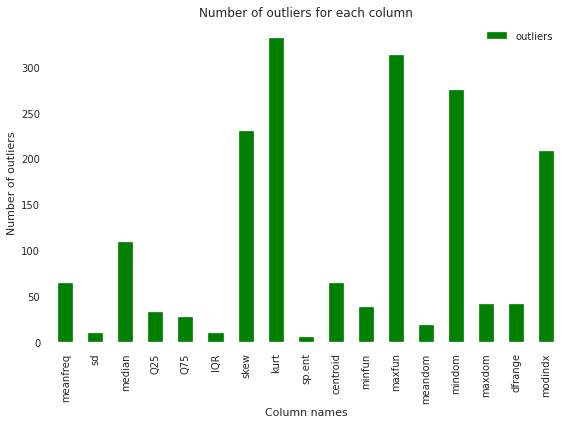

In [9]:
original_outlier_df=check_and_count_outliers(df_data_numeric, df_numeric_dsc, "Number of outliers for each column", 'g')
plt.savefig("Original_outlier_count.png")
plt.show()

In [10]:
original_outlier_df

,outliers
meanfreq,64
sd,10
median,109
Q25,33
Q75,27
IQR,10
skew,230
kurt,332
sp.ent,6
centroid,64


- Features - skew, kurt,maxfun,mindom,modindx have huge number of outliers

- The above outliers can be dropped if required from further analysis

### Plotting boxplot to detect outliers

In [0]:
def plot_columns_outliers(df, c, numr, numc):
  fig, axes=plt.subplots(nrows=numr, ncols=numc, sharex=False, sharey=False, figsize=(20, 20))
  for ax, column in zip(axes.flat, df.columns):
    sns.boxplot(df[column], ax=ax, color=c)

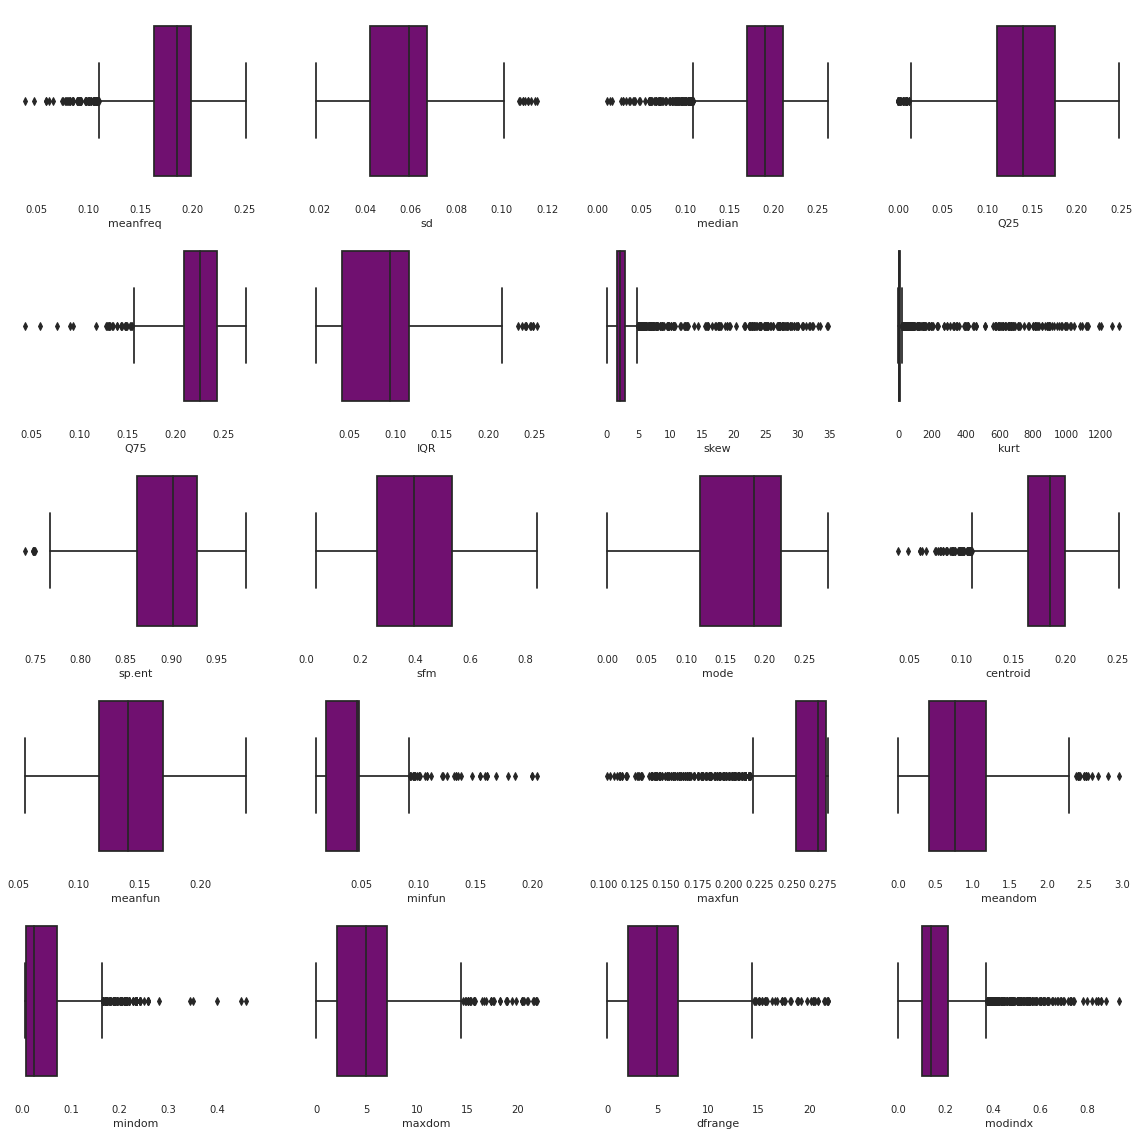

In [12]:
plot_columns_outliers(df_data_numeric, 'purple', 5, 4)
plt.savefig('Original_data_outlier_boxplot.png')
plt.show()

- meanfreq have most of the outlier near to the Q3 values, few are too far
- sd have few outliers but all are quite far from Q3 values
- median have large number of outliers
- Q25 have fewer outliers and near to Q3 values
- Q75 have fewer outliers but too far from Q3 values
- IQR have fewer outliers
- skew and kurt have most of the values as outliers
- sp.ent have fewer outliers
- sfm,mode have no outliers
- centroid have most of the outlier near to the Q3 values, few are too far
- meanfun have no outliers
- minfun,maxfun have too many outliers.
- meandom have few outliers
- mindom, maxdom, dfrange and modindx have too many outliers.

Apart from Q25,Q75,sp.ent,sfm,mode,meanfun and meandom which either have few or no outliers, rest all features have too many outliers which need to be resolved

<a id = Section8></a>
# 8. Distribution of the data

### Numeric data

In [0]:
def get_kurtosis(df, kurt_threshold):
  kurt_dict={}
  for col in df.columns:
    val=stats.kurtosis(df[col], bias=False)
    if (val>=kurt_threshold):
        kurt_dict[col]=val
  return pd.DataFrame(kurt_dict, index=[0]).T.dropna()

In [14]:
df_numeric_kurt_data=get_kurtosis(df_data_numeric, 3)
df_numeric_kurt_data

,0
skew,25.363446
kurt,35.932129
minfun,10.758086
maxfun,5.203918
modindx,5.924935


Generally kurtosis of value 3 is considered as normal and above 3 is leptokurtic where peak denotes outliers.

So, below fields have kurtosis > 3 , so contains outliers-

skw,kurt,minfun,maxfun,modindx



In [0]:
def get_skew(df, minval, maxval):
  skew_dict={}
  for col in df.columns:
    val=stats.skew(df[col], bias=False)
    if ((val<minval) | (val>maxval)):
      skew_dict[col]=val
  return pd.DataFrame(skew_dict, index=[0]).T.dropna()

In [114]:
df_numeric_skew_data=get_skew(df_data_numeric, -1, 1)
df_numeric_skew_data

,0
median,-1.012785
skew,4.933314
kurt,5.872586
minfun,1.878004
maxfun,-2.238535
mindom,1.661114
modindx,2.064335


- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
- If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
- If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

median, skew, kurt, minfun, maxfun, mindom and modindx have high skewness

In [0]:
def plot_columns_distribution(df, title, c, numr, numc):
  fig, axes=plt.subplots(nrows=numr, ncols=numc, sharex=False, sharey=False, figsize=(30, 20))
  for ax, column in zip(axes.flat, df.columns):
    sns.distplot(df[column], ax=ax, color=c)

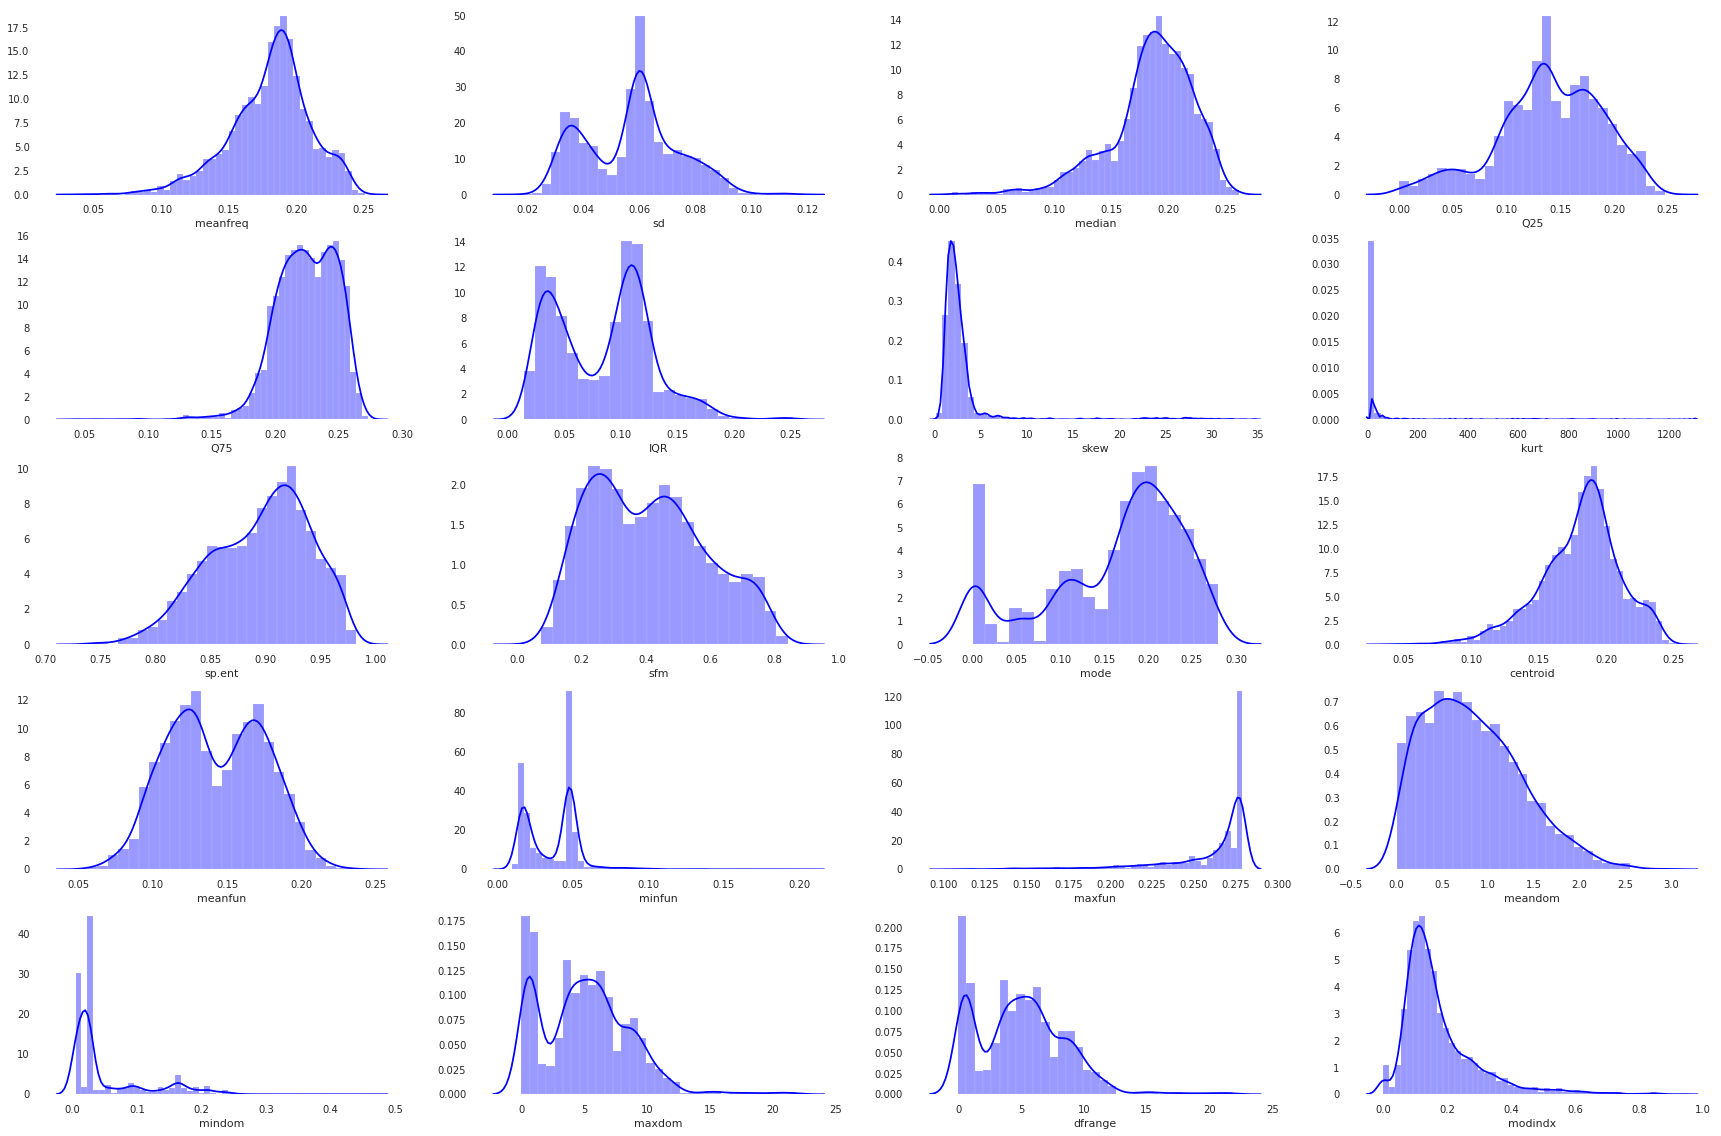

In [17]:
plot_columns_distribution(df_data_numeric, "Distribution", 'blue', 5, 4)
plt.savefig('Original_data_distribution.png')
plt.show()

As per the skew information above, 

median, skew, kurt, minfun, maxfun, mindom and modindx are highly skewed  while meanfreq,meanfun,sfm,sp.ent are close to normal

### Categorical data

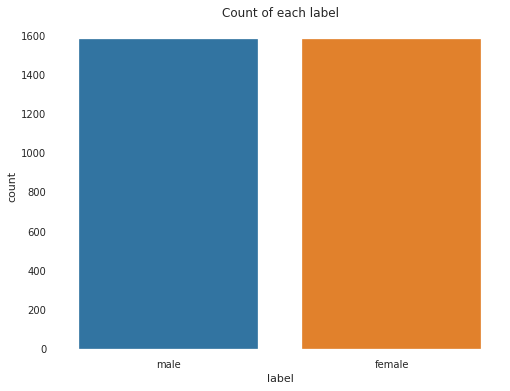

In [18]:
sns.countplot(x='label', data=df_data)
plt.title("Count of each label")
plt.savefig("Ouptut_label_distribution.png")
plt.show()

Equal distribution of categorical data

<a id = Section9></a>
# 9. Correlation between columns

In [19]:
corr=df_data.corr().abs()
corr

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,0.739039,0.925445,0.911416,0.740997,0.627605,0.322327,0.316036,0.601203,0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,0.216979
sd,0.739039,1.000000,0.562603,0.846931,0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,0.529150,0.739039,0.466281,0.345609,0.129662,0.482726,0.357667,0.482278,0.475999,0.122660
median,0.925445,0.562603,1.000000,0.774922,0.731849,0.477352,0.257407,0.243382,0.502005,0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,0.213298
Q25,0.911416,0.846931,0.774922,1.000000,0.477140,0.874189,0.319475,0.350182,0.648126,0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,0.141377
Q75,0.740997,0.161076,0.731849,0.477140,1.000000,0.009636,0.206339,0.148881,0.174905,0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,0.023750,0.335114,0.335648,0.216475
IQR,0.627605,0.874660,0.477352,0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,0.403764,0.627605,0.534462,0.222680,0.069588,0.333362,0.357037,0.337877,0.331563,0.041252
skew,0.322327,0.314597,0.257407,0.319475,0.206339,0.249497,1.000000,0.977020,0.195459,0.079694,0.434859,0.322327,0.167668,0.216954,0.080861,0.336848,0.061608,0.305651,0.304640,0.169325
kurt,0.316036,0.346241,0.243382,0.350182,0.148881,0.316185,0.977020,1.000000,0.127644,0.109884,0.406722,0.316036,0.194560,0.203201,0.045667,0.303234,0.103313,0.274500,0.272729,0.205539
sp.ent,0.601203,0.716620,0.502005,0.648126,0.174905,0.640813,0.195459,0.127644,1.000000,0.866411,0.325298,0.601203,0.513194,0.305826,0.120738,0.293562,0.294869,0.324253,0.319054,0.198074
sfm,0.784332,0.838086,0.661690,0.766875,0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,0.485913,0.784332,0.421066,0.362100,0.192369,0.428442,0.289593,0.436649,0.431580,0.211477


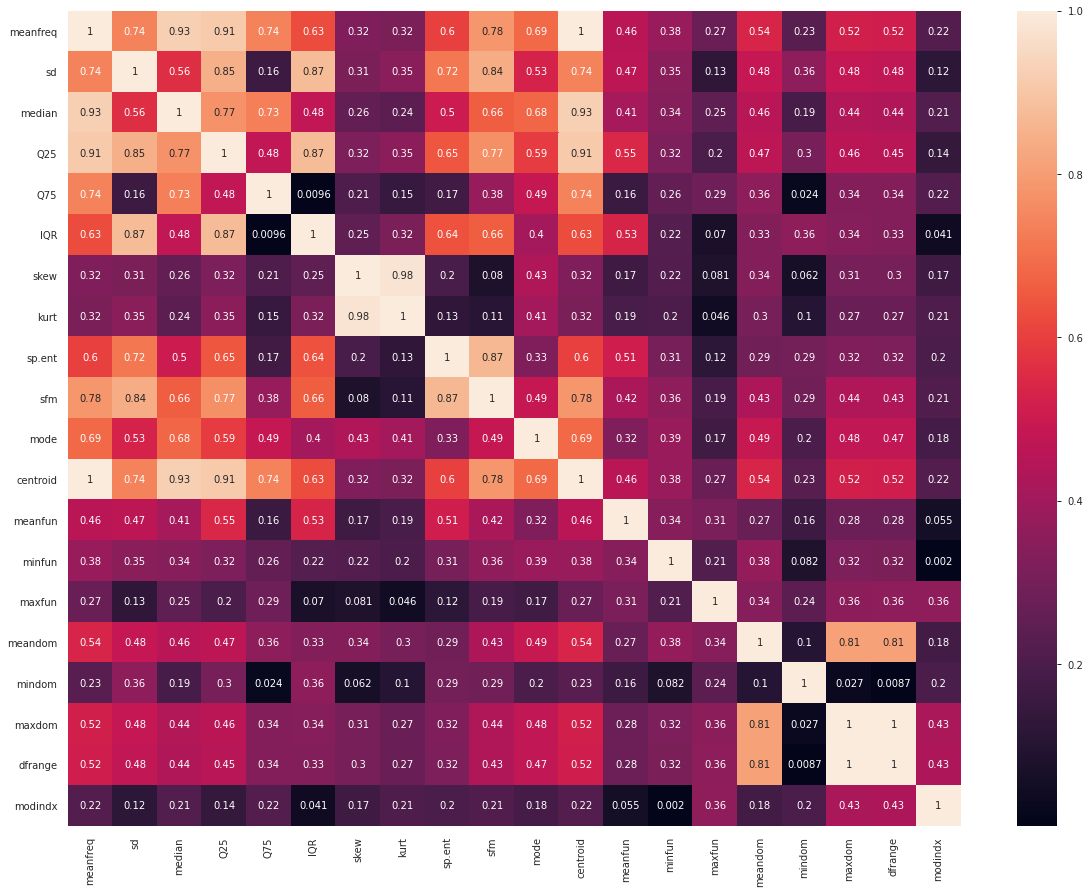

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
plt.savefig("Original_data_heatmap.png")
plt.show()

Correlation between columns assuming for now with coefficient value > 85.

So, following columns seems to be highly correlated-

- meanfreq with median and Q25 is highly correlated
- sd is highly correlated with IQR
- sp.ent is highly correlated with sfm
- centroid is highly correlated with median and Q25
- IQR is highly correlated with Q25
- sd is highly correlated with Q25

### Columns with correlation >90

In [0]:
def get_drop_columns(df, drop_threshold):
  upper = df.where(np.triu(np.ones(df.shape), k=1).astype(np.bool))
  to_drop = [column for column in upper.columns if any(upper[column] > drop_threshold)]
  return to_drop

In [0]:
def plot_heatmap(df, plot_threshold):
  upper = df.where(np.triu(np.ones(df.shape), k=1).astype(np.bool))
  plt.figure(figsize=(20,15))
  sns.heatmap(upper[upper>plot_threshold], annot=True)

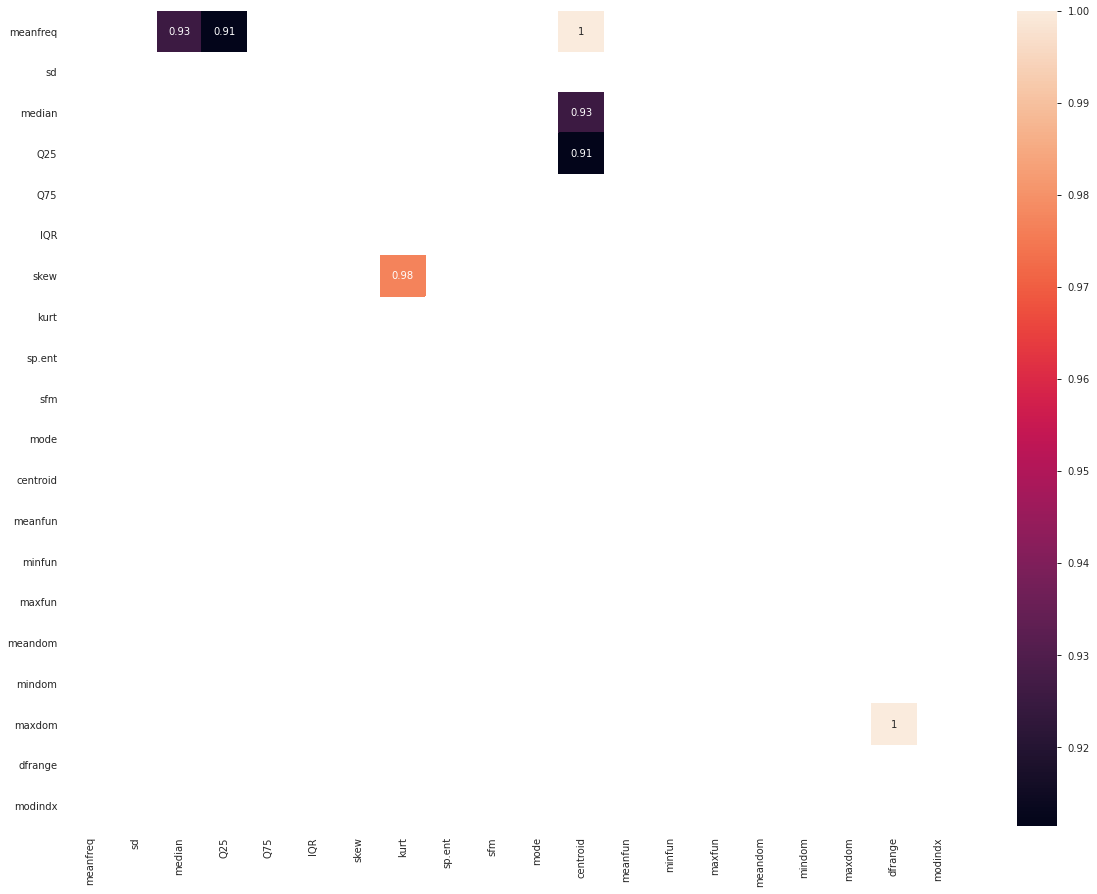

In [23]:
plot_heatmap(corr, 0.90)
plt.savefig("Original_data_heatmap_90.png")
plt.show()

In [24]:
drop_90_corr_cols=get_drop_columns(corr, 0.90)
drop_90_corr_cols

['median', 'Q25', 'kurt', 'centroid', 'dfrange']

### Columns with correlation >85

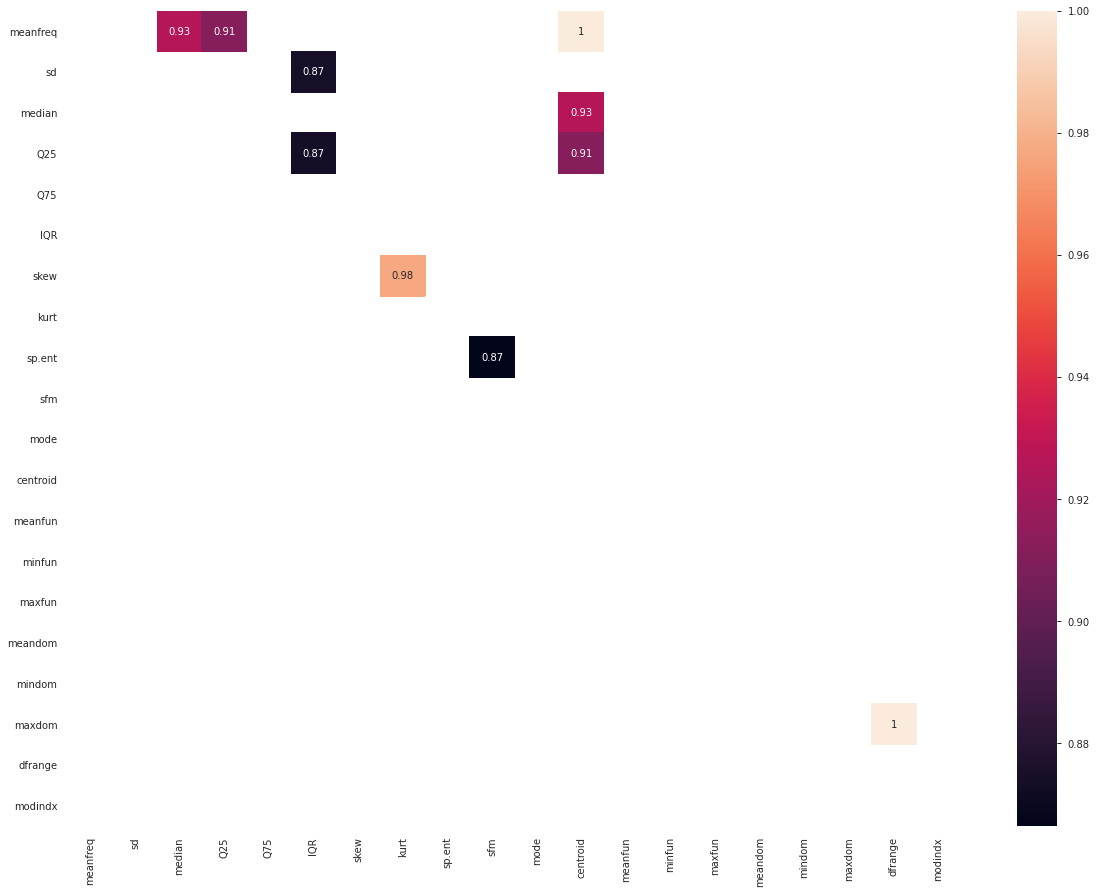

In [25]:
plot_heatmap(corr, 0.85)
plt.savefig("Original_data_heatmap_85.png")
plt.show()

In [26]:
drop_85_corr_cols=get_drop_columns(corr, 0.85)
drop_85_corr_cols

['median', 'Q25', 'IQR', 'kurt', 'sfm', 'centroid', 'dfrange']

### Columns with correlation >80

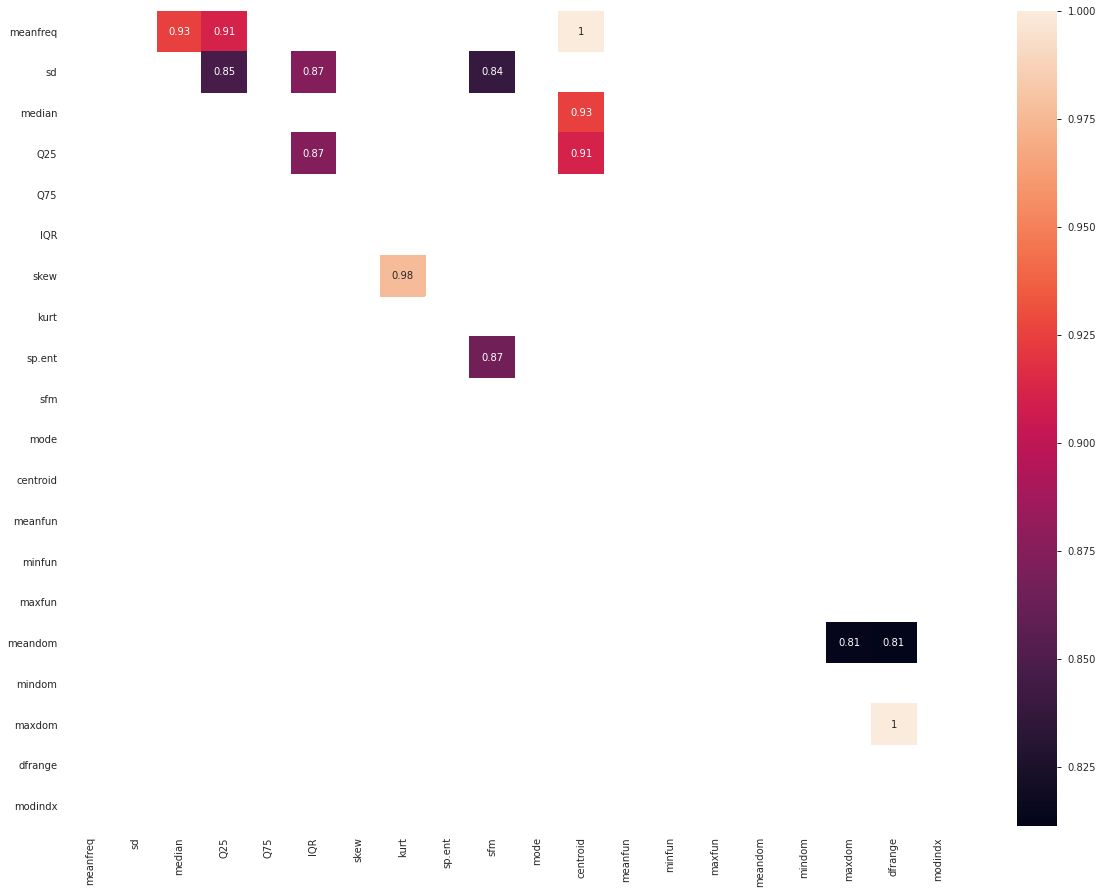

In [27]:
plot_heatmap(corr, 0.80)
plt.savefig("Original_data_heatmap_80.png")
plt.show()

In [28]:
drop_80_corr_cols=get_drop_columns(corr, 0.80)
drop_80_corr_cols

['median', 'Q25', 'IQR', 'kurt', 'sfm', 'centroid', 'maxdom', 'dfrange']

So, we have got the fields based on differentr correlation values - 90,85 and 80 and can use them for further experiment.

Can try to drop each set one by one and training model everytime to determine the best result.

Further we do similar EDA after dividing the dataset for each label - male and female and analyze the results to verify if any outlier/distribution observed above could be only for particular class

<a id = Section10></a>
# 10. Analysis on invidual category - male

In [29]:
df_male_data=df_data[df_data.label=='male']
df_male_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [30]:
df_male_data_numeric=df_male_data.select_dtypes(exclude='object')
df_male_numeric_dsc=df_male_data_numeric.describe()
df_male_numeric_dsc

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,0.170813,0.065110,0.175299,0.115562,0.226346,0.110784,3.295460,48.331698,0.917188,0.471670,0.152022,0.170813,0.115872,0.034175,0.253836,0.728877,0.040307,4.358447,4.318139,0.177430
std,0.026254,0.009455,0.037392,0.031999,0.024050,0.020415,5.135190,163.115940,0.028938,0.150473,0.084024,0.026254,0.017179,0.015749,0.036003,0.445997,0.049199,3.000285,3.000605,0.130132
min,0.039363,0.041747,0.010975,0.000240,0.042946,0.021841,0.326033,2.068455,0.786650,0.080963,0.000000,0.039363,0.055565,0.010953,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.155625,0.058957,0.149952,0.101205,0.211918,0.100960,1.461931,5.003020,0.899557,0.363316,0.098914,0.155625,0.104171,0.017719,0.246154,0.399170,0.007812,1.759766,1.751953,0.099184
50%,0.176343,0.061781,0.180612,0.122315,0.228117,0.109940,1.880420,6.970088,0.917309,0.461636,0.157557,0.176343,0.117254,0.036166,0.271186,0.686687,0.023438,4.457031,4.429688,0.139904
75%,0.190593,0.070915,0.202362,0.136044,0.244819,0.119331,2.645467,12.282596,0.936048,0.576902,0.228117,0.190593,0.128236,0.047572,0.277457,1.032536,0.031250,6.035156,6.000000,0.212205
max,0.225582,0.096030,0.248840,0.226740,0.268924,0.196168,34.537488,1271.353628,0.981997,0.831347,0.280000,0.225582,0.179051,0.121212,0.279070,2.805246,0.458984,21.867188,21.843750,0.932374


skew,kurt,maxdom,dfrange is not in the same range as other fields.

<a id = Section101></a>
## 10.1 Outliers checking for label - male

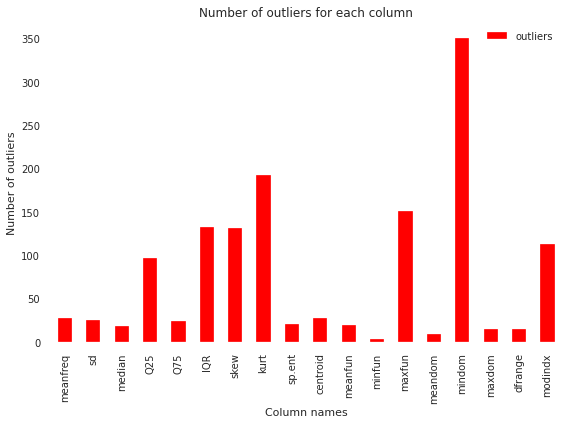

In [31]:
male_outlier_df=check_and_count_outliers(df_male_data_numeric, df_male_numeric_dsc, "Number of outliers for each column", 'r')
plt.savefig("Male_data_outlier_count.png")
plt.show()

In [33]:
male_outlier_df

,outliers
meanfreq,28
sd,25
median,19
Q25,97
Q75,24
IQR,133
skew,132
kurt,193
sp.ent,21
centroid,28


Q25, IQR, skew, kurt, maxfun, mindom,  modindx have number of outliers

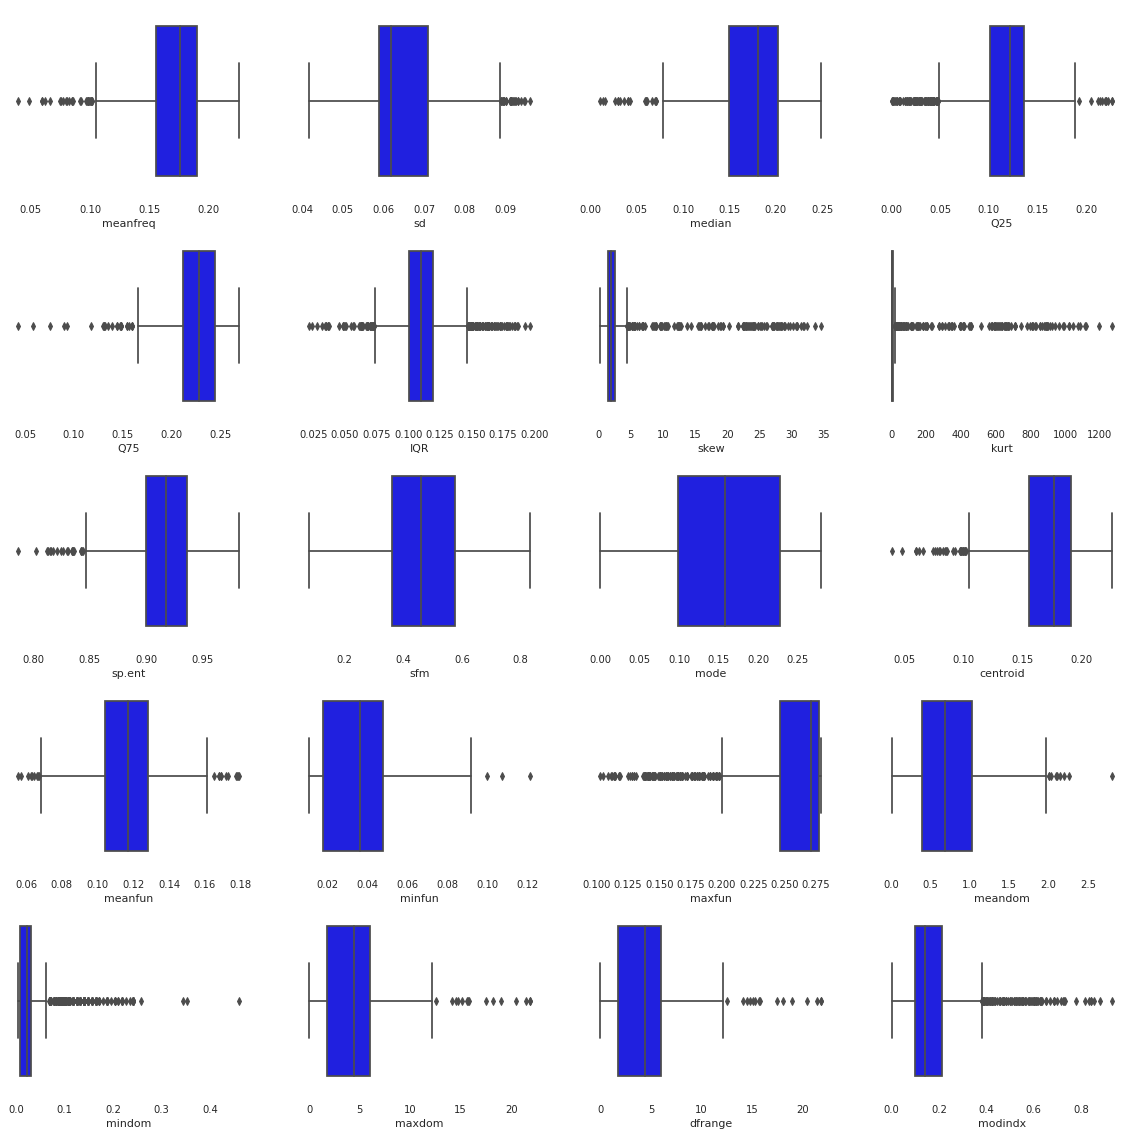

In [34]:
plot_columns_outliers(df_male_data_numeric, 'blue', 5, 4)
plt.savefig("Male_data_outlier_boxplot.png")
plt.show()

The outliers are similar except 
- meanfun have few outliers here as compared to original data where no outliers.
- minfun have few outliers as compared to original data where huge outliers.

<a id = Section102></a>
## 10.2 Data distribution for label - male

In [35]:
df_male_numeric_kurt_data=get_kurtosis(df_male_data_numeric, 3)
df_male_numeric_kurt_data

,0
Q75,5.997740
skew,15.567995
kurt,21.311681
maxfun,3.199793
mindom,7.680903
modindx,5.754965


In [115]:
df_male_numeric_skew_data=get_skew(df_male_data_numeric, -1, 1)
df_male_numeric_skew_data

,0
meanfreq,-1.011042
Q75,-1.467003
skew,3.985976
kurt,4.590226
centroid,-1.011042
maxfun,-1.938699
mindom,2.382271
modindx,2.095146


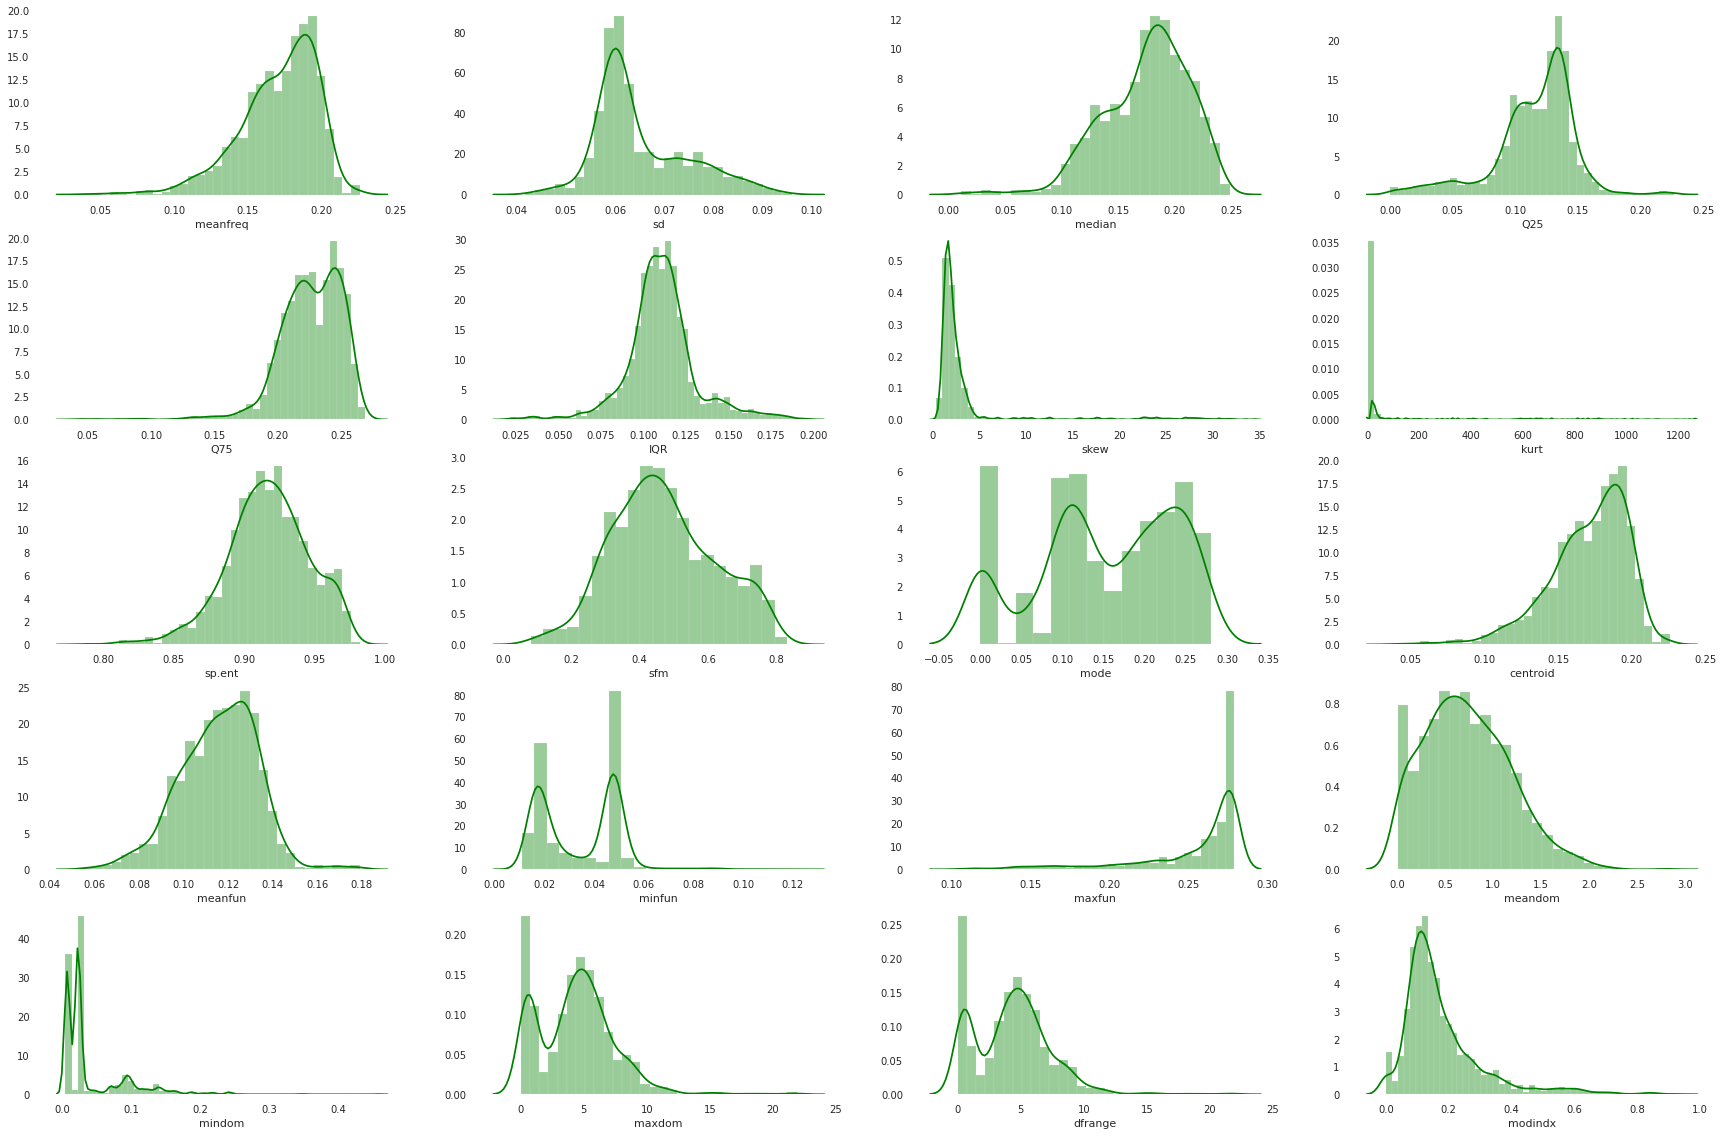

In [37]:
plot_columns_distribution(df_male_data_numeric, "Distribution", 'green', 5, 4)
plt.savefig("Male_data_distribution.png")
plt.show()

- meanfreq is bit skewed as compared to original data where it is almost normal
- Q25 has more peak as compared to original data
- IQR is more normal as compared to original data

<a id = Section103></a>
## 10.3 Correlated columns for label - male

In [38]:
corr=df_male_data_numeric.corr().abs()
corr

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,0.711680,0.934959,0.935038,0.870159,0.440531,0.419185,0.380447,0.345735,0.692702,0.723364,1.000000,0.468830,0.510828,0.175966,0.551964,0.251614,0.483724,0.479547,0.172644
sd,0.711680,1.000000,0.634791,0.759309,0.351615,0.775966,0.494713,0.475334,0.322990,0.736615,0.566145,0.711680,0.310403,0.455890,0.086456,0.431177,0.306364,0.339188,0.334129,0.054050
median,0.934959,0.634791,1.000000,0.814830,0.766063,0.374742,0.345645,0.305489,0.334008,0.621631,0.712428,0.934959,0.390918,0.470800,0.156176,0.525583,0.256038,0.465190,0.460942,0.192893
Q25,0.935038,0.759309,0.814830,1.000000,0.770289,0.660012,0.466870,0.434461,0.267082,0.646643,0.657240,0.935038,0.462826,0.450366,0.141194,0.496801,0.264572,0.423785,0.419402,0.100630
Q75,0.870159,0.351615,0.766063,0.770289,1.000000,0.029329,0.274070,0.236132,0.241245,0.487539,0.571935,0.870159,0.451560,0.403765,0.184556,0.445810,0.131779,0.405200,0.402996,0.215841
IQR,0.440531,0.775966,0.374742,0.660012,0.029329,1.000000,0.408931,0.402825,0.134439,0.439236,0.356421,0.440531,0.193495,0.230269,0.003896,0.253523,0.259464,0.186914,0.182640,0.096544
skew,0.419185,0.494713,0.345645,0.466870,0.274070,0.408931,1.000000,0.984004,0.299435,0.116715,0.476952,0.419185,0.397975,0.290925,0.057341,0.429899,0.102960,0.382771,0.381042,0.205719
kurt,0.380447,0.475334,0.305489,0.434461,0.236132,0.402825,0.984004,1.000000,0.260550,0.122918,0.428343,0.380447,0.356296,0.263770,0.031908,0.383320,0.116310,0.336696,0.334753,0.245288
sp.ent,0.345735,0.322990,0.334008,0.267082,0.241245,0.134439,0.299435,0.260550,1.000000,0.795001,0.175698,0.345735,0.128003,0.331339,0.066217,0.091863,0.141817,0.063018,0.060686,0.105804
sfm,0.692702,0.736615,0.621631,0.646643,0.487539,0.439236,0.116715,0.122918,0.795001,1.000000,0.437893,0.692702,0.323493,0.460349,0.149748,0.330174,0.222166,0.277170,0.273498,0.101385


### Columns with correlation > 90

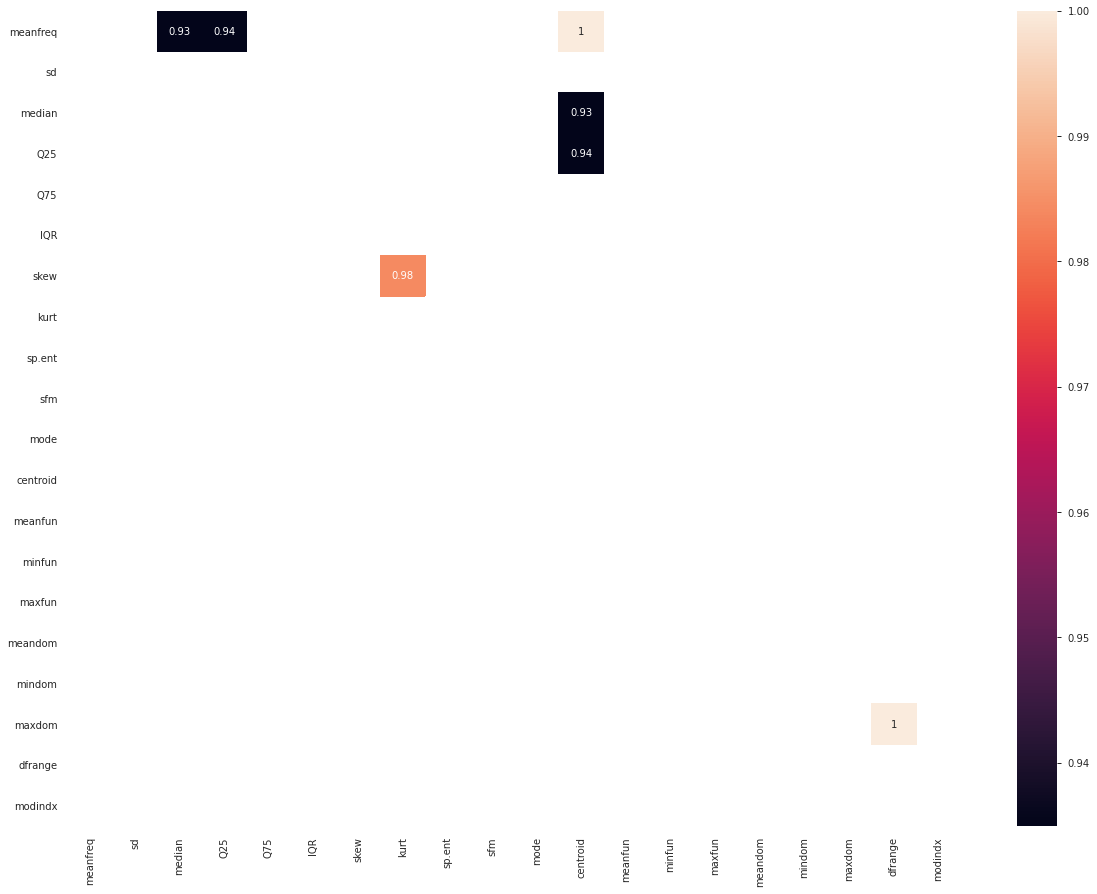

In [39]:
plot_heatmap(corr, 0.90)
plt.savefig("Male_data_heatmap_90.png")
plt.show()

In [40]:
drop_90_male_corr_cols=get_drop_columns(corr, 0.90)
drop_90_male_corr_cols

['median', 'Q25', 'kurt', 'centroid', 'dfrange']

### Columns with correlation > 85

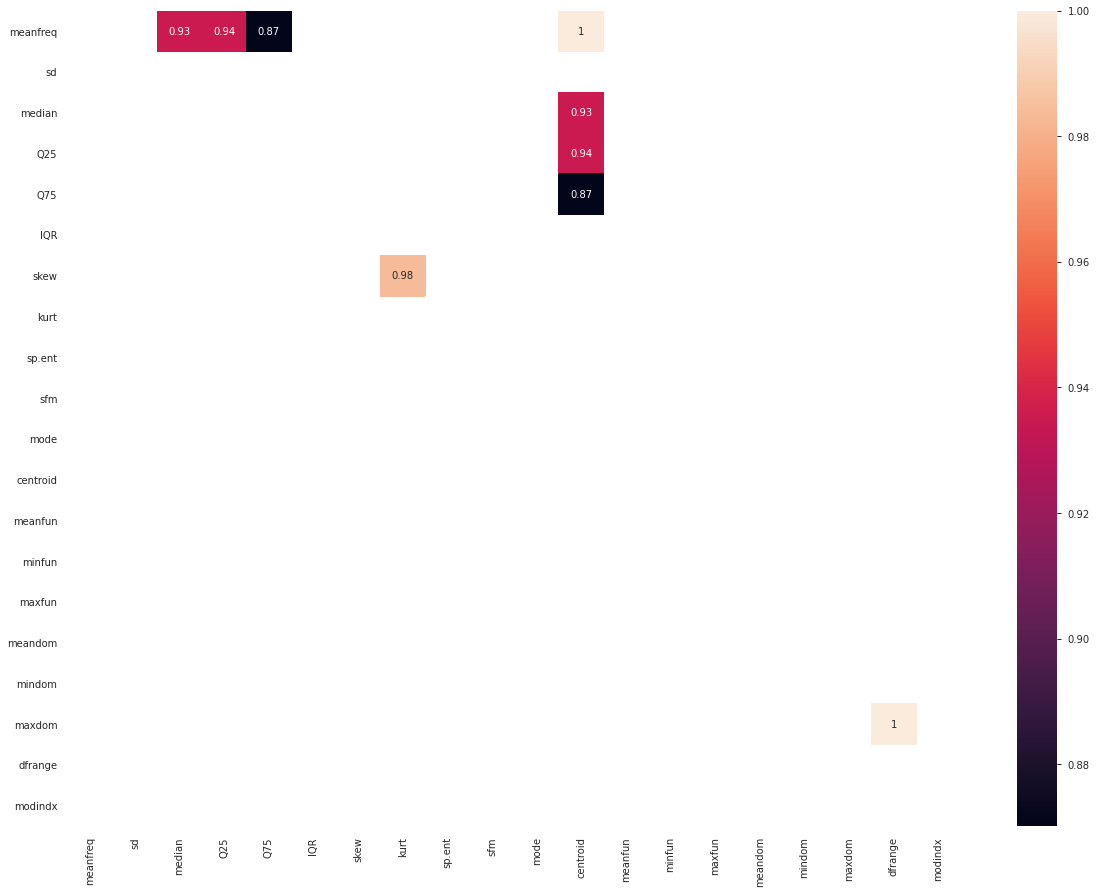

In [41]:
plot_heatmap(corr, 0.85)
plt.savefig("Male_data_heatmap_85.png")
plt.show()

In [42]:
drop_85_male_corr_cols=get_drop_columns(corr, 0.85)
drop_85_male_corr_cols

['median', 'Q25', 'Q75', 'kurt', 'centroid', 'dfrange']

### Columns with correlation > 80

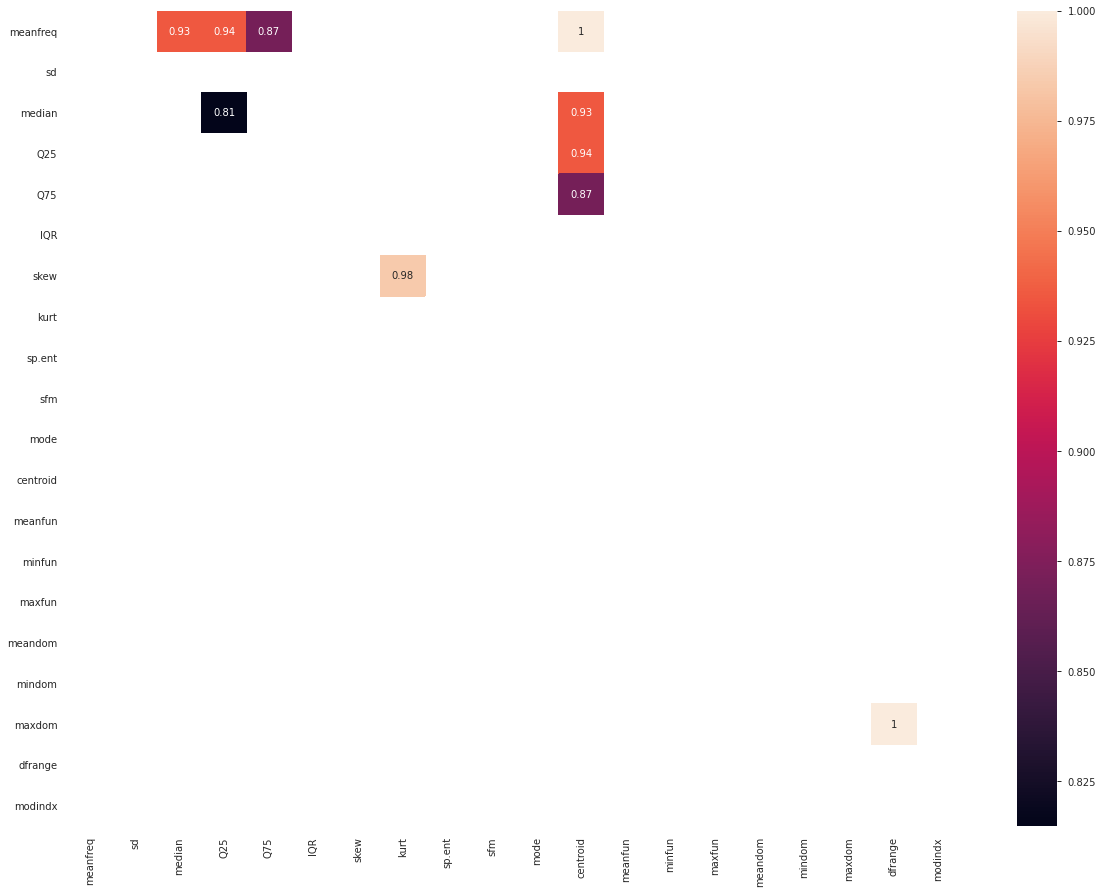

In [43]:
plot_heatmap(corr, 0.80)
plt.savefig("Male_data_heatmap_80.png")
plt.show()

In [44]:
drop_80_male_corr_cols=get_drop_columns(corr, 0.80)
drop_80_male_corr_cols

['median', 'Q25', 'Q75', 'kurt', 'centroid', 'dfrange']

<a id = Section11></a>
# 11. Analysis on invidual category - female

In [45]:
df_female_data=df_data[df_data.label=='female']
df_female_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1584,0.158108,0.082782,0.191191,0.062350,0.224552,0.162202,2.801344,19.929617,0.952161,0.679223,0.049926,0.158108,0.185042,0.023022,0.275862,0.272964,0.046875,0.742188,0.695312,0.339888,female
1585,0.182855,0.067789,0.200639,0.175489,0.226068,0.050579,3.001890,19.865482,0.910458,0.506099,0.050020,0.182855,0.159590,0.018713,0.266667,0.258970,0.054688,0.804688,0.750000,0.269231,female
1586,0.199807,0.061974,0.211358,0.184422,0.235687,0.051265,2.543841,14.921964,0.904432,0.425289,0.049961,0.199807,0.156465,0.016194,0.266667,0.250446,0.054688,0.898438,0.843750,0.329521,female
1587,0.195280,0.072087,0.204656,0.180611,0.255954,0.075344,2.392326,10.061489,0.907115,0.524209,0.193435,0.195280,0.182629,0.024922,0.275862,0.269531,0.054688,0.703125,0.648438,0.294717,female
1588,0.208504,0.057550,0.220229,0.190343,0.249759,0.059416,1.707786,5.670912,0.879674,0.343548,0.050165,0.208504,0.162043,0.016807,0.262295,0.260789,0.054688,0.812500,0.757812,0.251546,female


In [46]:
df_female_data_numeric=df_female_data.select_dtypes(exclude='object')
df_female_numeric_dsc=df_female_data_numeric.describe()
df_female_numeric_dsc

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,0.191000,0.049142,0.195942,0.165349,0.223184,0.057834,2.984875,24.805224,0.873066,0.344763,0.178541,0.191000,0.169742,0.039429,0.263848,0.929544,0.064987,5.736107,5.671120,0.170073
std,0.029960,0.018380,0.032149,0.049767,0.023121,0.042924,3.091454,97.669114,0.047288,0.179854,0.067175,0.029960,0.018460,0.021845,0.021529,0.576884,0.072739,3.854042,3.856124,0.107639
min,0.078847,0.018363,0.035114,0.000229,0.127637,0.014558,0.141735,2.209673,0.738651,0.036876,0.000000,0.078847,0.091912,0.009775,0.163934,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.177031,0.034977,0.181021,0.157892,0.206280,0.031106,1.962717,6.764500,0.839784,0.208125,0.168883,0.177031,0.157395,0.019116,0.258065,0.450566,0.023438,2.560547,2.435547,0.101201
50%,0.192732,0.041965,0.198226,0.175373,0.223744,0.042689,2.435808,9.607635,0.865861,0.277228,0.193670,0.192732,0.169408,0.047013,0.274286,0.867405,0.023438,6.042969,5.964844,0.138995
75%,0.211981,0.060452,0.216214,0.195243,0.241486,0.061268,3.086396,14.448639,0.908557,0.478122,0.218152,0.211981,0.181832,0.048534,0.277457,1.338521,0.140625,8.607422,8.531250,0.201557
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.978482,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.449219,21.796875,21.773438,0.857764


skew, kurt, maxdom,dfrange seems to have value out of range as compared to other fields

<a id = Section111></a>
## 11.1 Outliers checking for label- female

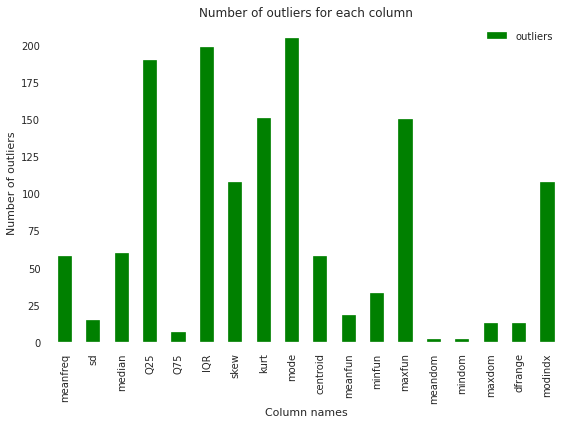

In [47]:
female_outlier_df=check_and_count_outliers(df_female_data_numeric, df_female_numeric_dsc, "Number of outliers for each column", 'g')
plt.savefig("Female_data_outlier_count.png")
plt.show()

In [48]:
female_outlier_df

,outliers
meanfreq,58
sd,15
median,60
Q25,190
Q75,7
IQR,199
skew,108
kurt,151
mode,205
centroid,58


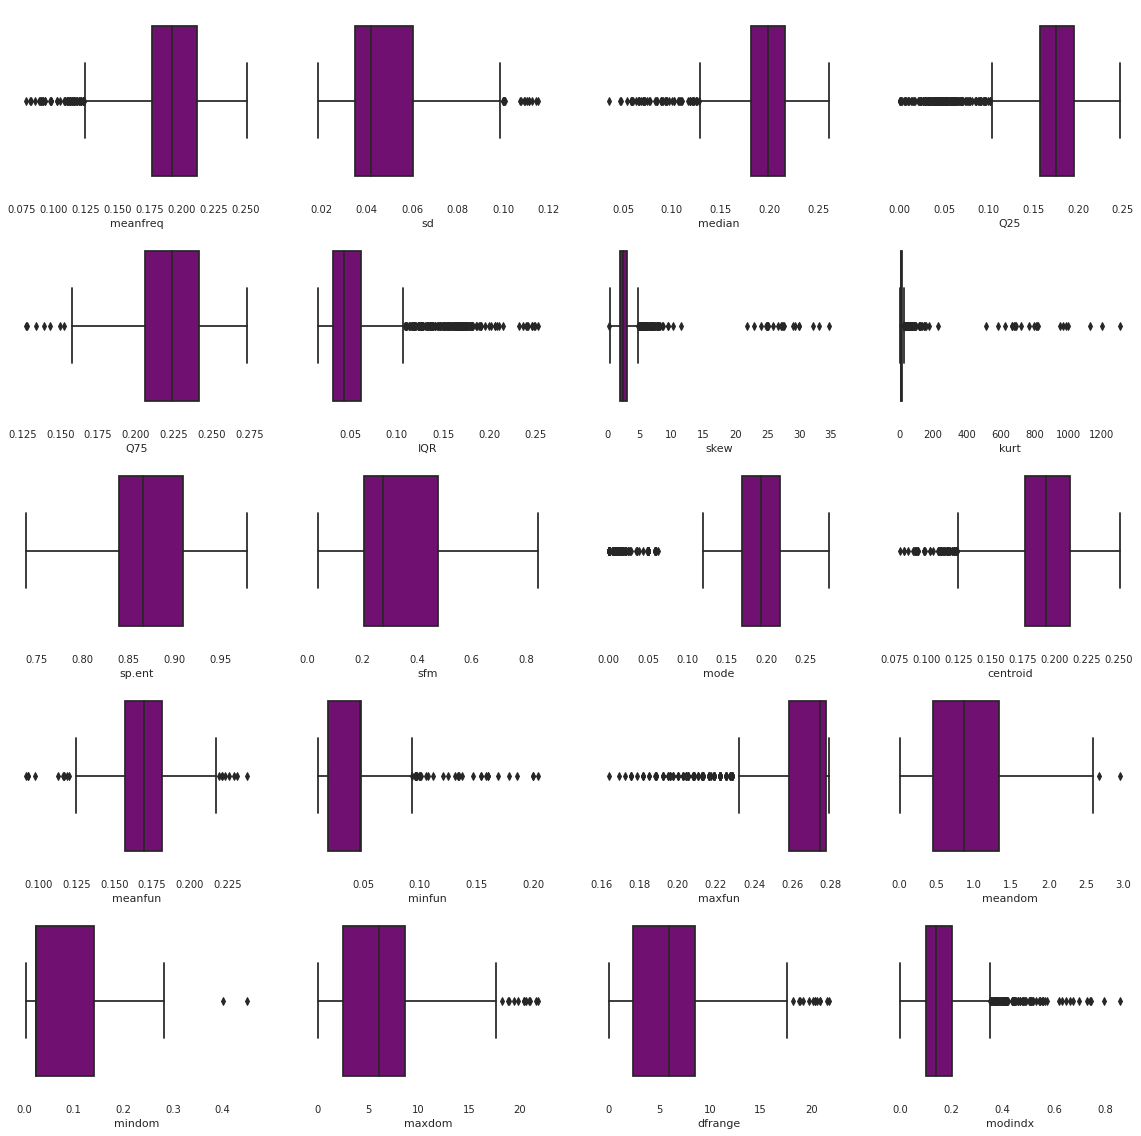

In [49]:
plot_columns_outliers(df_female_data_numeric, 'purple', 5, 4)
plt.savefig("Female_data_outlier_boxplot.png")
plt.show()

Difference from original data-

- Q25 have high values of outliers
- sp.ent have no outliers
- meanfun have outliers
- mindom have very few outliers
- mode have outliers.


<a id = Section112></a>
## 11.2 Data distribution for label - female


In [50]:
df_female_numeric_kurt_data=get_kurtosis(df_female_data_numeric, 3)
df_female_numeric_kurt_data

,0
median,4.053858
IQR,3.483181
skew,54.540084
kurt,85.749029
minfun,11.568382
maxfun,3.198399
modindx,5.157749


In [116]:
df_female_numeric_skew_data=get_skew(df_female_data_numeric, -1, 1)
df_female_numeric_skew_data

,0
sd,1.044137
median,-1.425379
Q25,-1.538497
IQR,1.988007
skew,6.954461
kurt,8.967001
mode,-1.503242
minfun,2.241735
maxfun,-1.897689
mindom,1.177909


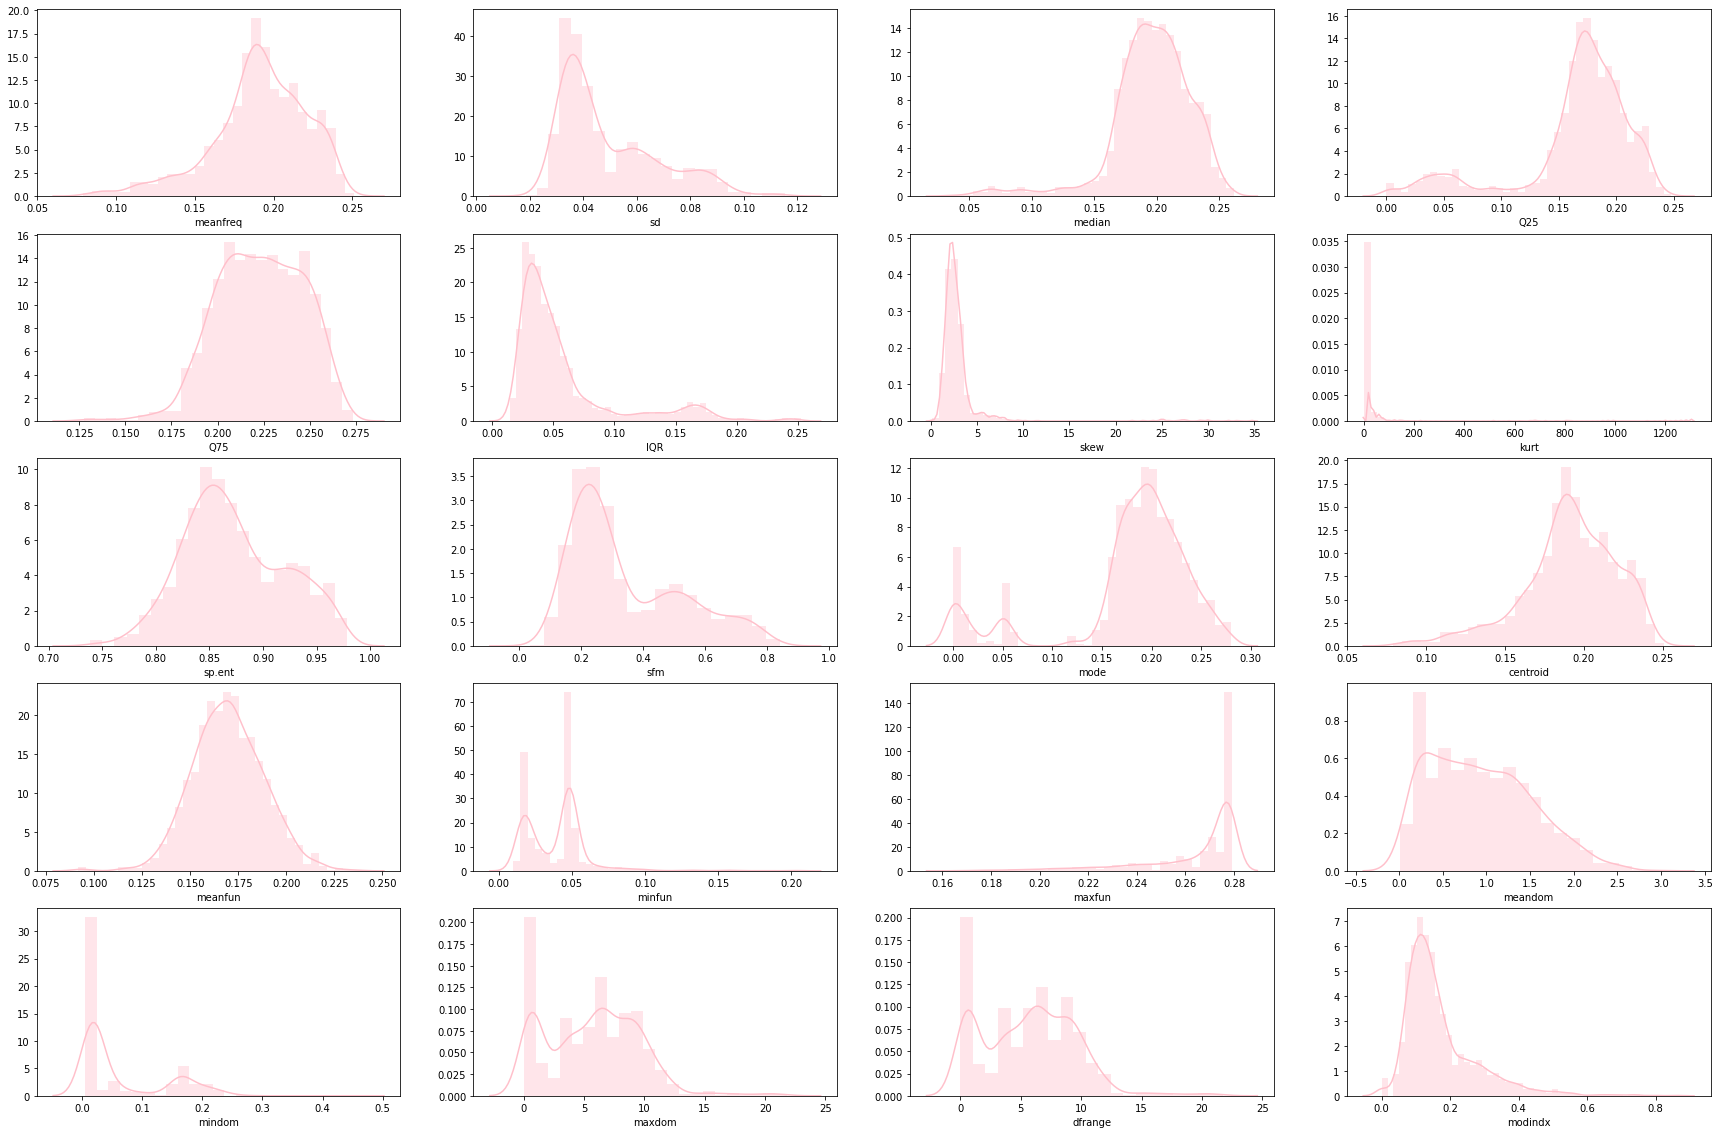

In [53]:
plot_columns_distribution(df_female_data_numeric, "Distribution", 'pink', 5, 4)
plt.savefig("Female_data_distribution.png")
plt.show()

 - meanfreq is bit skewed as compared to original data
 - centroid is bit skewed
 - meanfun is almost neutral

<a id = Section113></a>
## 11.3 Correlated columns for label - female


In [52]:
corr=df_female_data.corr().abs()
corr

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,0.724035,0.921676,0.916983,0.766525,0.650298,0.239267,0.234265,0.642528,0.800922,0.653086,1.000000,0.245114,0.271068,0.350143,0.484916,0.135077,0.497793,0.494976,0.275125
sd,0.724035,1.000000,0.494450,0.815612,0.169833,0.854172,0.315809,0.353958,0.728286,0.875689,0.566455,0.724035,0.061979,0.277567,0.051832,0.473934,0.310105,0.507469,0.501345,0.250641
median,0.921676,0.494450,1.000000,0.784329,0.810212,0.472962,0.098855,0.089993,0.542940,0.646190,0.598358,0.921676,0.282257,0.200046,0.341314,0.354882,0.065998,0.371317,0.369872,0.242408
Q25,0.916983,0.815612,0.784329,1.000000,0.507934,0.885841,0.308635,0.359595,0.634304,0.780210,0.603627,0.916983,0.128944,0.223530,0.161772,0.411665,0.229846,0.430823,0.426254,0.194595
Q75,0.766525,0.169833,0.810212,0.507934,1.000000,0.050270,0.112267,0.026984,0.250595,0.387571,0.427402,0.766525,0.317758,0.177986,0.526904,0.334177,0.111772,0.322614,0.324548,0.224647
IQR,0.650298,0.854172,0.472962,0.885841,0.050270,1.000000,0.297371,0.402393,0.600454,0.695841,0.469649,0.650298,0.021658,0.163297,0.096251,0.297297,0.326698,0.325737,0.319398,0.104615
skew,0.239267,0.315809,0.098855,0.308635,0.112267,0.297371,1.000000,0.962134,0.252725,0.018194,0.360689,0.239267,0.043324,0.163339,0.127355,0.272021,0.014395,0.253398,0.252990,0.105985
kurt,0.234265,0.353958,0.089993,0.359595,0.026984,0.402393,0.962134,1.000000,0.181727,0.042977,0.349550,0.234265,0.035577,0.147550,0.031174,0.226162,0.076211,0.212321,0.210768,0.143417
sp.ent,0.642528,0.728286,0.542940,0.634304,0.250595,0.600454,0.252725,0.181727,1.000000,0.890936,0.392665,0.642528,0.273806,0.253590,0.036132,0.302750,0.271219,0.366854,0.361540,0.308116
sfm,0.800922,0.875689,0.646190,0.780210,0.387571,0.695841,0.018194,0.042977,0.890936,1.000000,0.505147,0.800922,0.172969,0.266535,0.157014,0.433885,0.252145,0.481052,0.476036,0.336759


### Columns with correlation > 90

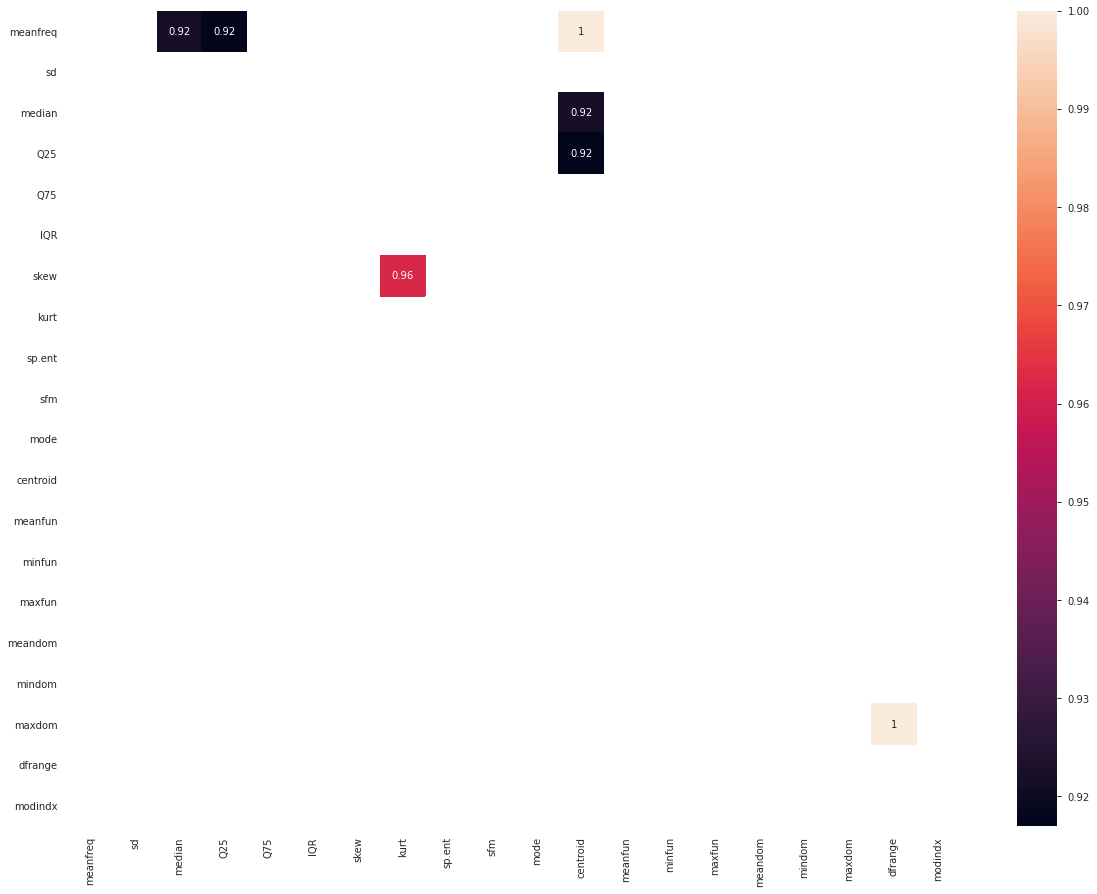

In [53]:
plot_heatmap(corr, 0.90)
plt.savefig("Female_data_heatmap_90.png")
plt.show()

In [54]:
drop_female_90_corr_cols=get_drop_columns(corr, 0.90)
drop_female_90_corr_cols

['median', 'Q25', 'kurt', 'centroid', 'dfrange']

### Columns with correlation > 85

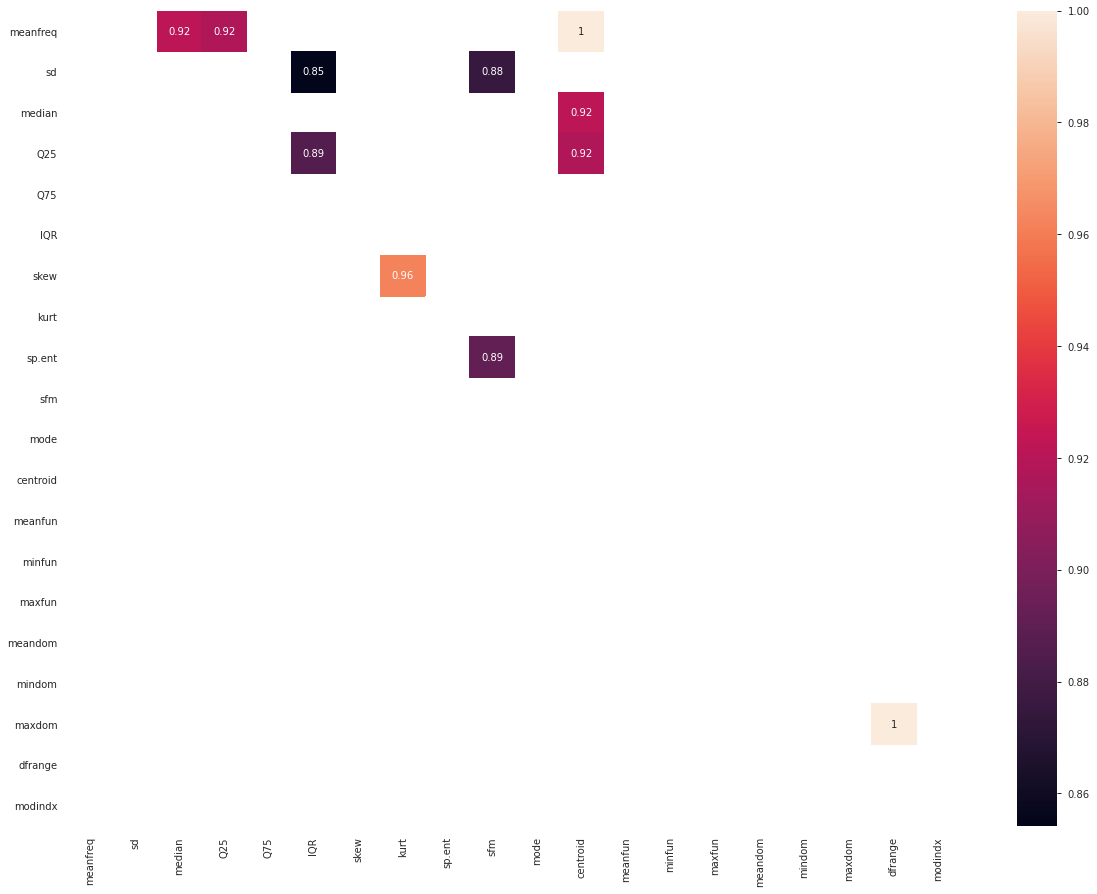

In [55]:
plot_heatmap(corr, 0.85)
plt.savefig("Female_data_heatmap_85.png")
plt.show()

In [56]:
drop_female_85_corr_cols=get_drop_columns(corr, 0.85)
drop_female_85_corr_cols

['median', 'Q25', 'IQR', 'kurt', 'sfm', 'centroid', 'dfrange']

### Columns with correlation > 80

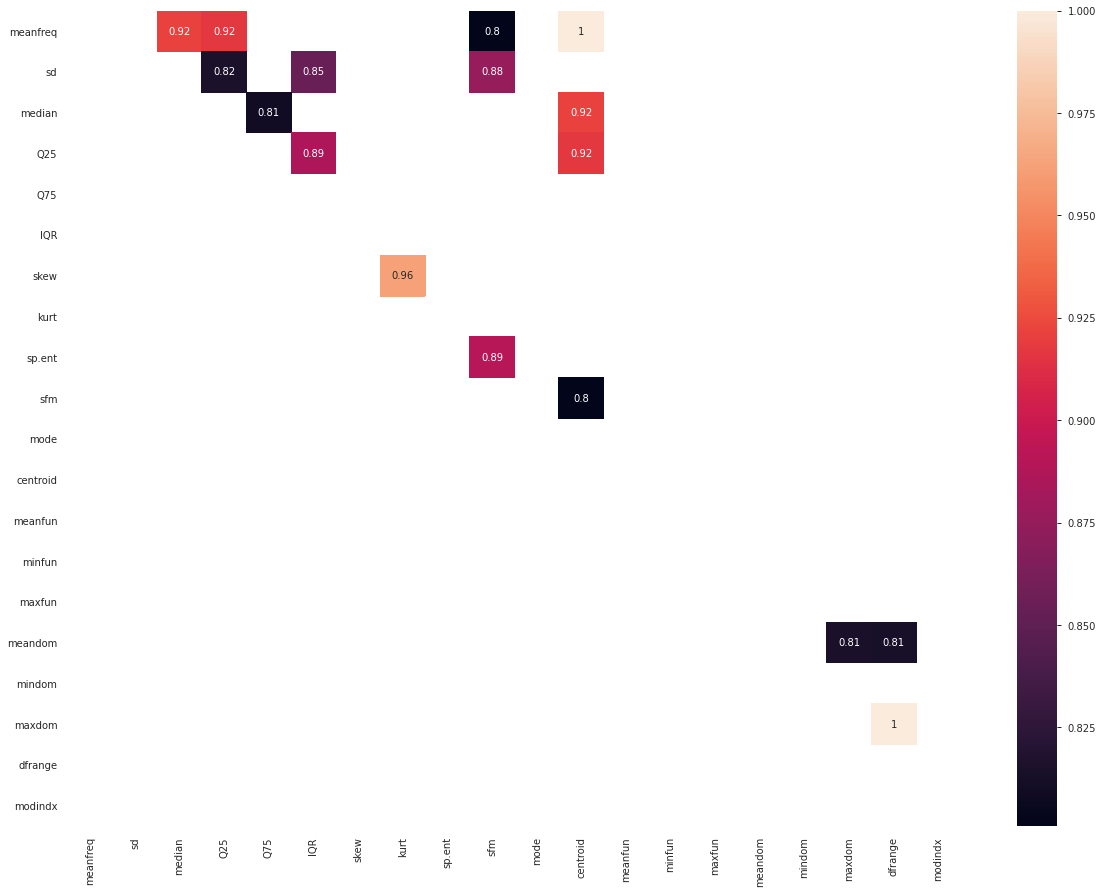

In [57]:
plot_heatmap(corr, 0.80)
plt.savefig("Female_data_heatmap_80.png")
plt.show()

In [58]:
drop_female_80_corr_cols=get_drop_columns(corr, 0.80)
drop_female_80_corr_cols

['median', 'Q25', 'Q75', 'IQR', 'kurt', 'sfm', 'centroid', 'maxdom', 'dfrange']

<a id = Section12></a>
# 12. Observations from analysis om the dataset

<a id = Section121></a>
## 12.1 Columns kurtosis comparison with individual label data

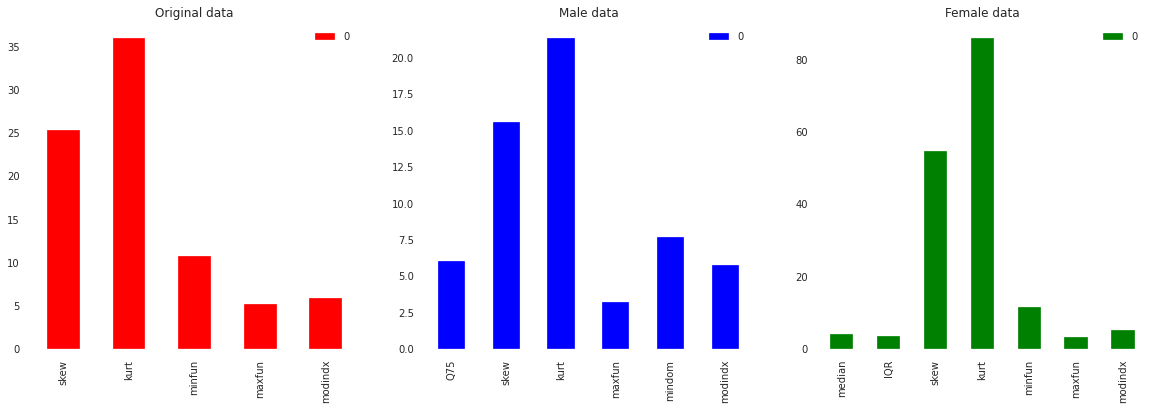

In [59]:
fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(20,6))
df_numeric_kurt_data.plot(kind='bar', color='r', ax=ax[0])
ax[0].set_title('Original data')
df_male_numeric_kurt_data.plot(kind='bar', color='b', ax=ax[1])
ax[1].set_title('Male data')
df_female_numeric_kurt_data.plot(kind='bar', color='g', ax=ax[2])
ax[2].set_title('Female data')
plt.savefig("Kurtosis_data.png")
plt.show()

- skew,kurt,modindx,maxfun,minfun almost in all the cases

- The kurtosis value of skew and kurt is high in case of female data as compared to other data - male and combined, while other fields have low kurtosis in female data.

<a id = Section122></a>
## 12.2 Columns skewness comparison with individual label data

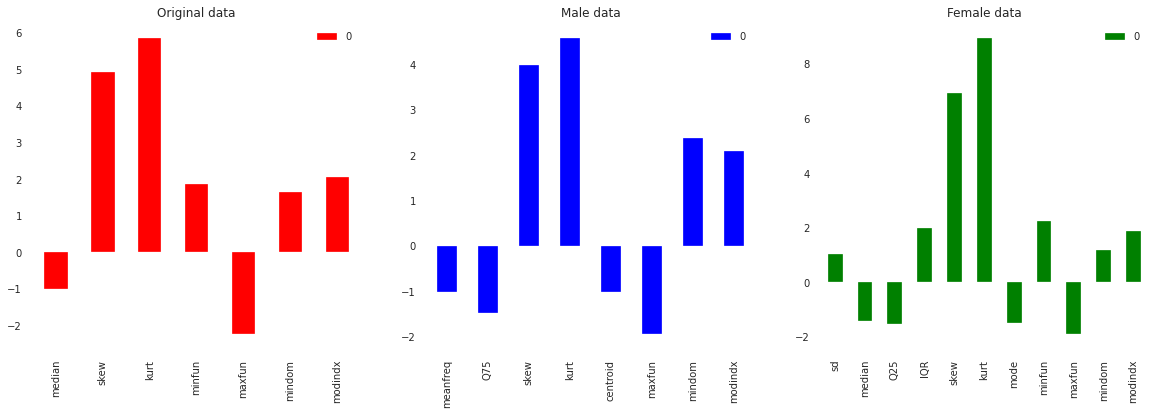

In [117]:
fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(20,6))
df_numeric_skew_data.plot(kind='bar', color='r', ax=ax[0])
ax[0].set_title('Original data')
df_male_numeric_skew_data.plot(kind='bar', color='b', ax=ax[1])
ax[1].set_title('Male data')
df_female_numeric_skew_data.plot(kind='bar', color='g', ax=ax[2])
ax[2].set_title('Female data')
plt.savefig("Skew_data.png")
plt.show()

- skew, kurt have high skewness in all the cases, especially, female data have compararively higher values.

- maxfun is highley -ve skewed in all the three data while modindx and mindom highly +ve skewed in all

<a id = Section123></a>
## 12.3 Column correlation comparison with individual label outliers

In [61]:
pd.DataFrame(zip(drop_90_corr_cols, drop_90_male_corr_cols, drop_female_90_corr_cols), columns=['Combined','Male','Female'])

,Combined,Male,Female
0,median,median,median
1,Q25,Q25,Q25
2,kurt,kurt,kurt
3,centroid,centroid,centroid
4,dfrange,dfrange,dfrange


For threshold 90 - columns are same 

In [62]:
pd.DataFrame(zip(drop_80_corr_cols, drop_80_male_corr_cols, drop_female_80_corr_cols), columns=['Combined','Male','Female'])

,Combined,Male,Female
0,median,median,median
1,Q25,Q25,Q25
2,IQR,Q75,Q75
3,kurt,kurt,IQR
4,sfm,centroid,kurt
5,centroid,dfrange,sfm


For threshold 80 - since Q75 not in combined data, can include it along with drop_80_corr_cols while experiment with ML model

In [63]:
pd.DataFrame(zip(drop_85_corr_cols, drop_85_male_corr_cols, drop_female_85_corr_cols), columns=['Combined','Male','Female'])

,Combined,Male,Female
0,median,median,median
1,Q25,Q25,Q25
2,IQR,Q75,IQR
3,kurt,kurt,kurt
4,sfm,centroid,sfm
5,centroid,dfrange,centroid


For threshold 85 -For threshold 80 - since Q75 not in combined data, can include it along with drop_85_corr_cols while experiment with ML model

- Data is skewed so need to be scaled and may be normalized as few columns have too much skewness.
- Too much kurtosis and outliers, so can be removed before feeding the data to the model, since combined data and individual label data have different sets of columns with different columns so need to experiment with different column sets.


<a id = Section124></a>
## 12.4 Outlier comparison with individual label outliers

In [64]:
outlier_df=pd.concat([original_outlier_df,male_outlier_df,female_outlier_df],axis=1, sort=False)
outlier_df.columns=['combined','male','female']
outlier_df

,combined,male,female
meanfreq,64.0,28.0,58.0
sd,10.0,25.0,15.0
median,109.0,19.0,60.0
Q25,33.0,97.0,190.0
Q75,27.0,24.0,7.0
IQR,10.0,133.0,199.0
skew,230.0,132.0,108.0
kurt,332.0,193.0,151.0
sp.ent,6.0,21.0,NaN
centroid,64.0,28.0,58.0


<Figure size 1800x1080 with 0 Axes>

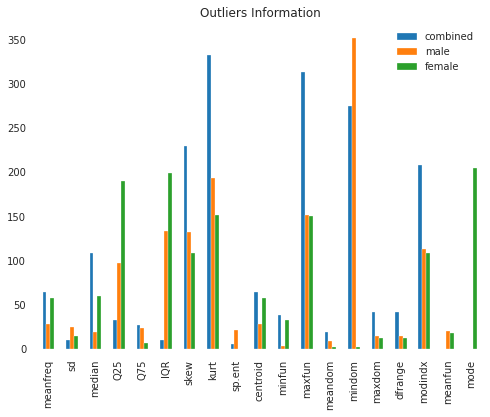

In [65]:
plt.figure(figsize=(25,15))
outlier_df.plot(kind='bar')
plt.title("Outliers Information")
plt.savefig("Combined_outlier_count.png")
plt.show()


<a id = Section13></a>
# 13. Data Preprocessing

<a id = Section131></a>
## 13.1 Dropping Outliers


In [0]:
def drop_outliers(df):
  Q1=df.quantile(0.25)
  Q3=df.quantile(0.75)
  IQR=Q3-Q1
  return df[~((df<(Q1 - 1.5 * IQR)) | (df>(Q3 + 1.5 * IQR))).any(axis=1)]

In [67]:
df_data_numeric_nout=drop_outliers(df_data).copy()
df_data_numeric_nout.reset_index(drop=True, inplace=True)
df_data_numeric_nout.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000
mean,0.187059,0.055301,0.193263,0.147419,0.229663,0.082244,2.073514,8.479436,0.896082,0.391594,0.184751,0.187059,0.145349,0.038347,0.268678,0.919950,0.036108,5.718784,5.682677,0.146303
std,0.024900,0.015375,0.029192,0.042016,0.020171,0.038991,0.689561,4.403374,0.042596,0.174139,0.063866,0.024900,0.028919,0.014683,0.014172,0.471656,0.040890,2.931069,2.932464,0.067997
min,0.112575,0.021782,0.108297,0.019935,0.163117,0.016587,0.285020,2.293368,0.771167,0.082204,0.000000,0.112575,0.071168,0.009775,0.219178,0.056848,0.004883,0.132812,0.070312,0.019881
25%,0.174869,0.040827,0.177826,0.124483,0.213968,0.044038,1.554291,5.236556,0.864636,0.249183,0.159884,0.174869,0.122770,0.020434,0.266667,0.566406,0.023438,3.796875,3.750000,0.097900
50%,0.188639,0.058312,0.194493,0.143045,0.230533,0.091075,2.000917,7.308963,0.901686,0.361473,0.196969,0.188639,0.141445,0.047105,0.275862,0.888494,0.023438,5.695312,5.648438,0.129079
75%,0.201194,0.063506,0.213952,0.177437,0.246519,0.112368,2.531819,10.493231,0.926609,0.509271,0.230073,0.201194,0.169869,0.048096,0.277457,1.236618,0.023438,7.968750,7.945312,0.175085
max,0.251124,0.095798,0.261224,0.247347,0.273469,0.195527,4.316059,25.592068,0.976533,0.826099,0.280000,0.251124,0.225755,0.091429,0.279114,2.284943,0.164062,14.320312,14.296875,0.370370


In [68]:
df_data_numeric_nout.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
1,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
2,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
3,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
4,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male


In [69]:
df_data_numeric_nout.shape

(2147, 21)

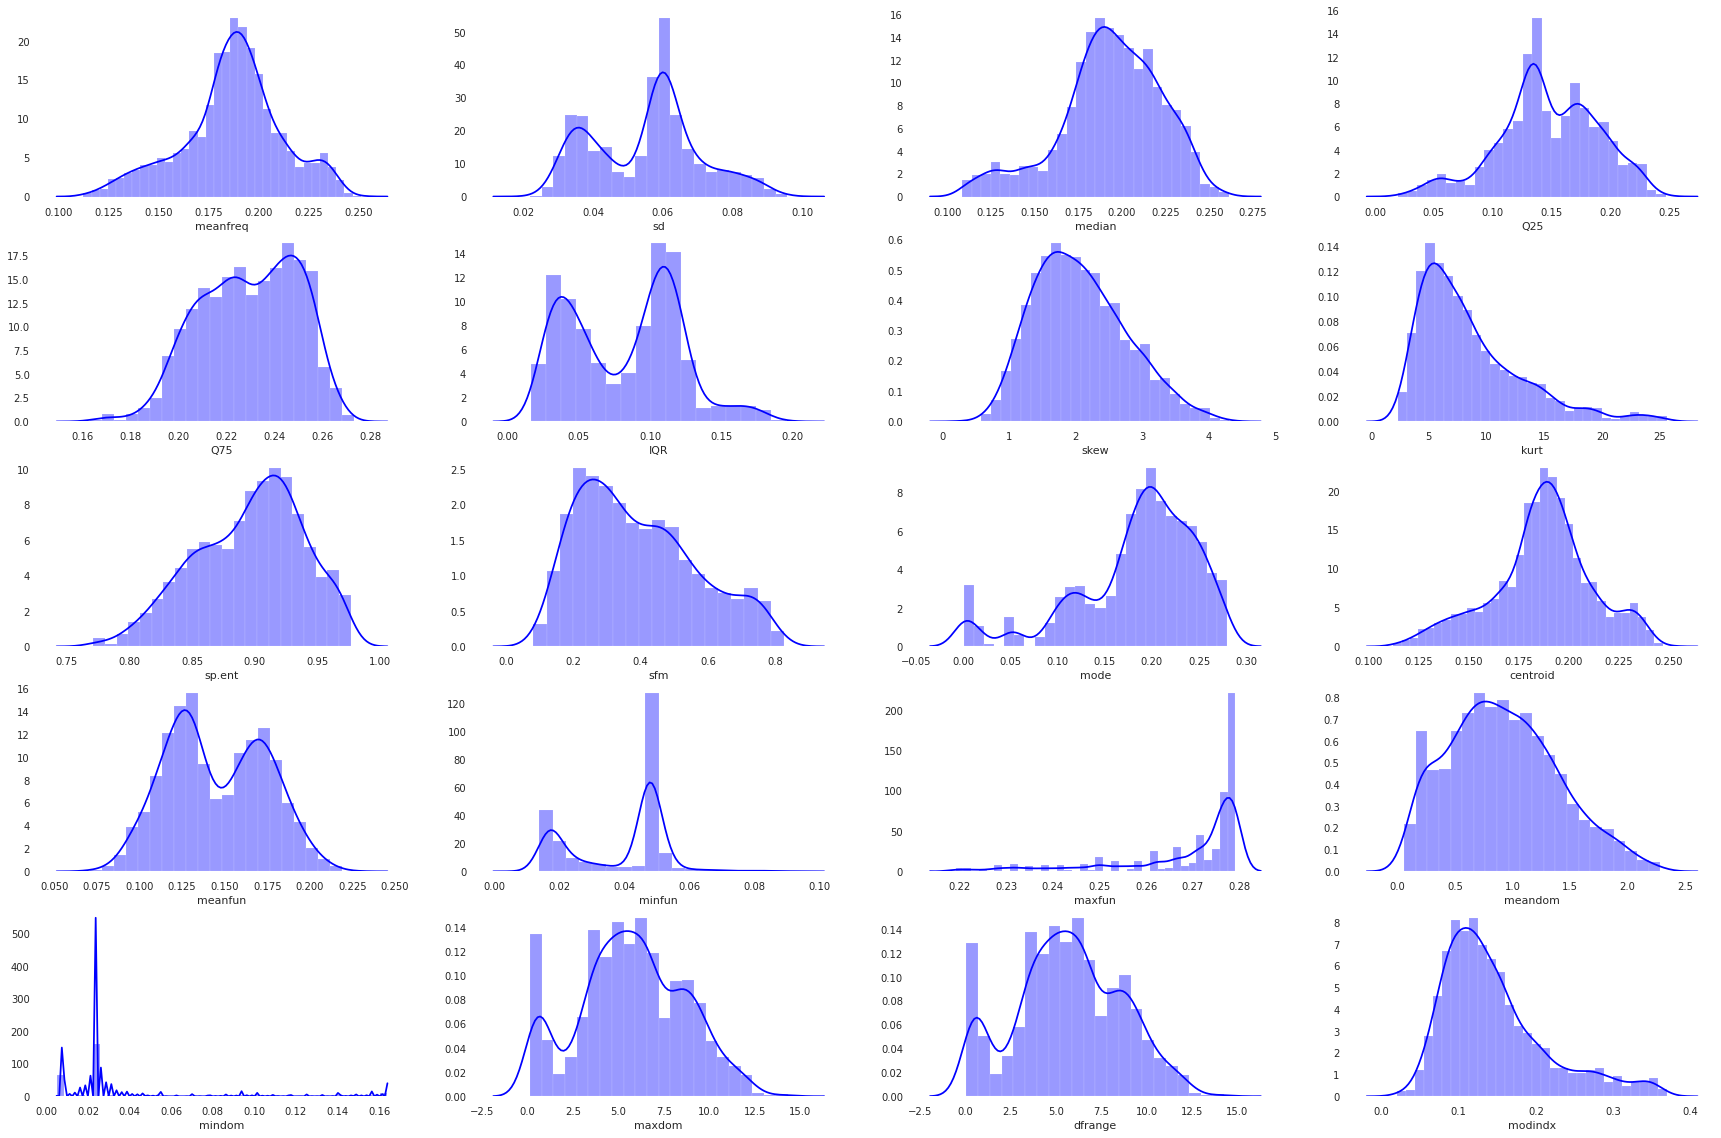

In [70]:
plot_columns_distribution(df_data_numeric_nout, "Distribution", 'blue', 5, 4)
plt.savefig("No_outlier_data_distribution.png")
plt.show()


Apart from maxfun, the data seems to be comparatively normal distribution from with outliers.

Further scaling will be done before feeding to ML model

<a id = Section132></a>
## 13.2 Dropping highly correlated columns

As we have seen above, we can try removing below correlated columns -

- drop_90_corr_cols
- drop_85_corr_cols
- drop_85_corr_cols + Q75
- drop_80_corr_cols
- drop_80_corr_cols + Q75

In [71]:
df_data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [72]:
df_data_numeric_nout.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [73]:
drop_90_corr_cols

['median', 'Q25', 'kurt', 'centroid', 'dfrange']

In [74]:
df_data_1=df_data_numeric_nout.drop(drop_90_corr_cols, axis=1)
df_data_1.columns

Index(['meanfreq', 'sd', 'Q75', 'IQR', 'skew', 'sp.ent', 'sfm', 'mode',
       'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'modindx',
       'label'],
      dtype='object')

In [75]:
drop_85_corr_cols

['median', 'Q25', 'IQR', 'kurt', 'sfm', 'centroid', 'dfrange']

In [76]:
df_data_2=df_data_numeric_nout.drop(drop_85_corr_cols, axis=1)
df_data_2.columns

Index(['meanfreq', 'sd', 'Q75', 'skew', 'sp.ent', 'mode', 'meanfun', 'minfun',
       'maxfun', 'meandom', 'mindom', 'maxdom', 'modindx', 'label'],
      dtype='object')

In [77]:
df_data_3=df_data_numeric_nout.drop(drop_85_corr_cols+['Q75'], axis=1)
df_data_3.columns

Index(['meanfreq', 'sd', 'skew', 'sp.ent', 'mode', 'meanfun', 'minfun',
       'maxfun', 'meandom', 'mindom', 'maxdom', 'modindx', 'label'],
      dtype='object')

In [78]:
df_data_4=df_data_numeric_nout.drop(drop_80_corr_cols, axis=1)
df_data_4.columns

Index(['meanfreq', 'sd', 'Q75', 'skew', 'sp.ent', 'mode', 'meanfun', 'minfun',
       'maxfun', 'meandom', 'mindom', 'modindx', 'label'],
      dtype='object')

In [79]:
df_data_5=df_data_numeric_nout.drop(drop_80_corr_cols+['Q75'], axis=1)
df_data_5.columns

Index(['meanfreq', 'sd', 'skew', 'sp.ent', 'mode', 'meanfun', 'minfun',
       'maxfun', 'meandom', 'mindom', 'modindx', 'label'],
      dtype='object')

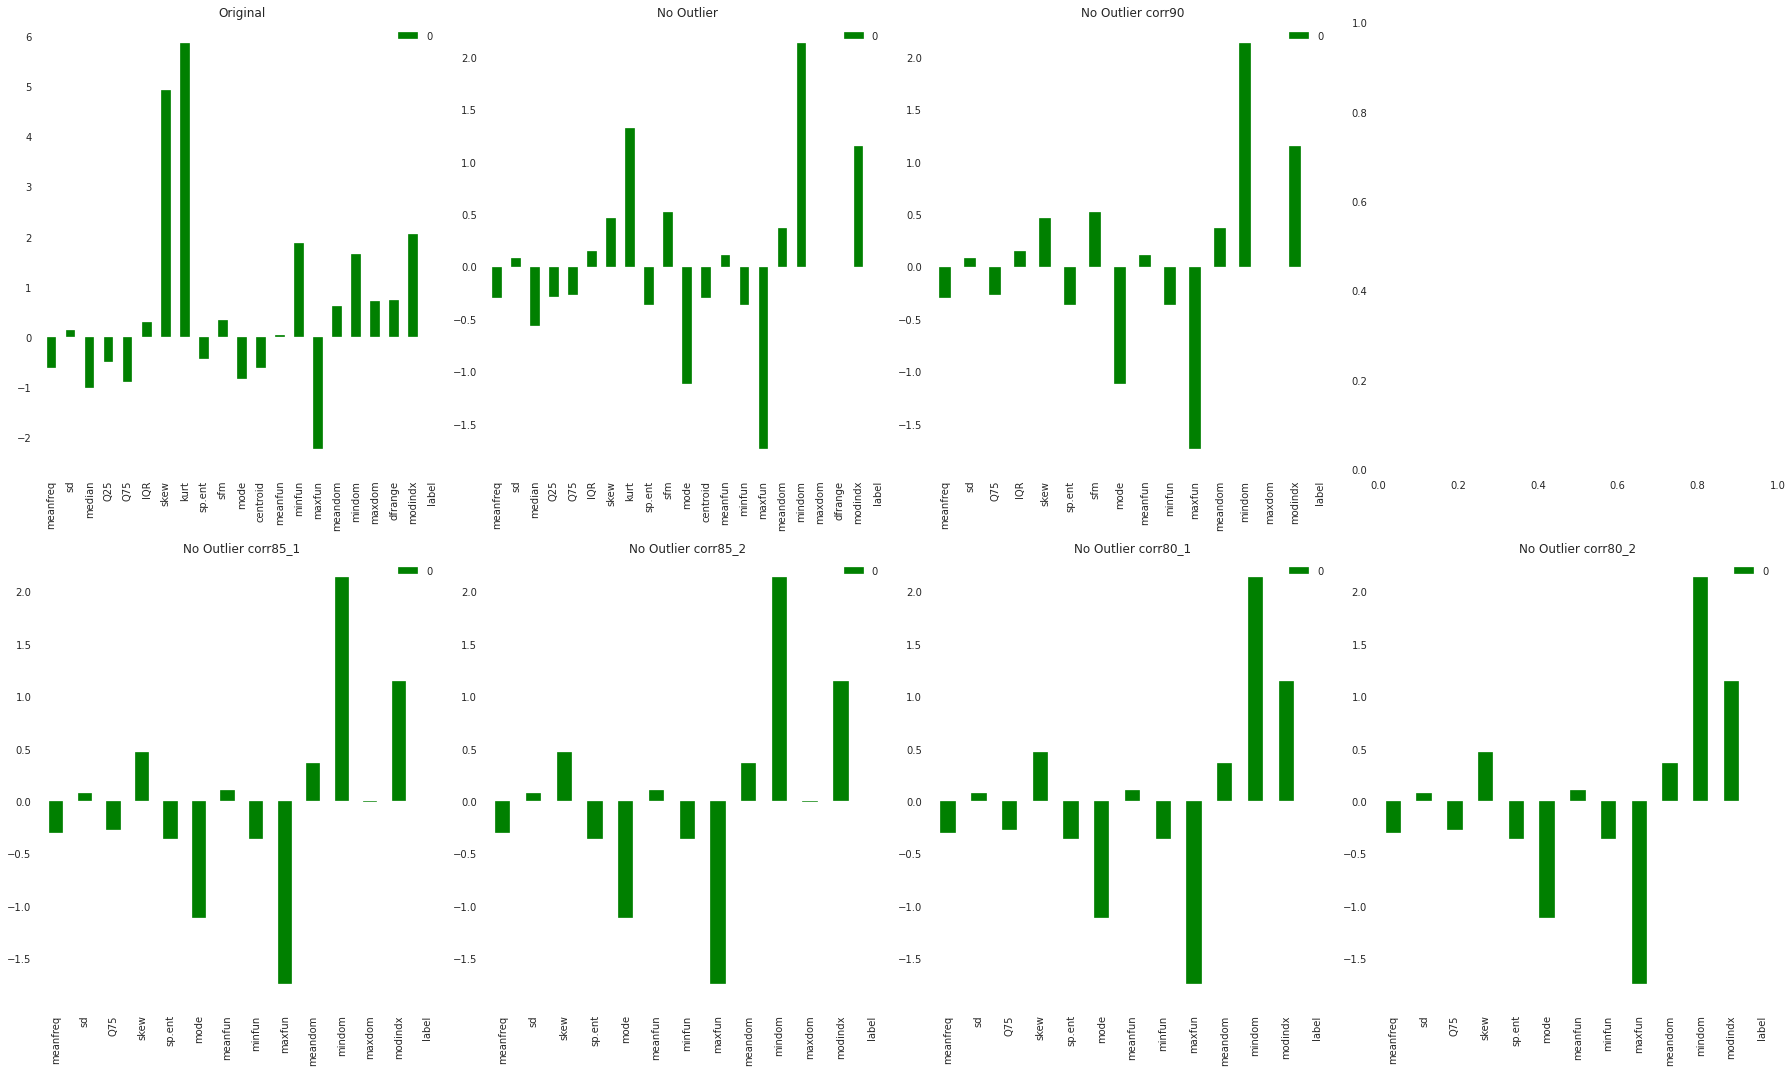

In [80]:
#Plotting skewness of various data transformations done above
fig,ax=plt.subplots(nrows=2, ncols=4, figsize=(25, 15), sharex=False, sharey=False)
pd.DataFrame(df_data.skew(), index=df_data.columns).plot(kind='bar', ax=ax[0,0], color='g')
ax[0,0].set_title('Original')
pd.DataFrame(df_data_numeric_nout.skew(), index=df_data_numeric_nout.columns).plot(kind='bar', ax=ax[0,1] , color='g')
ax[0,1].set_title('No Outlier')
pd.DataFrame(df_data_1.skew(), index=df_data_1.columns).plot(kind='bar', ax=ax[0,2], color='g')
ax[0,2].set_title('No Outlier corr90')

pd.DataFrame(df_data_2.skew(), index=df_data_2.columns).plot(kind='bar', ax=ax[1,0] ,color='g')
ax[1,0].set_title('No Outlier corr85_1')
pd.DataFrame(df_data_3.skew(), index=df_data_3.columns).plot(kind='bar', ax=ax[1,1],color='g')
ax[1,1].set_title('No Outlier corr85_2')
pd.DataFrame(df_data_4.skew(), index=df_data_4.columns).plot(kind='bar', ax=ax[1,2] ,color='g')
ax[1,2].set_title('No Outlier corr80_1')
pd.DataFrame(df_data_4.skew(), index=df_data_4.columns).plot(kind='bar', ax=ax[1,3] ,color='g')
ax[1,3].set_title('No Outlier corr80_2')

plt.tight_layout()
plt.savefig("SKew_no_outlier_no_corr.png")
plt.show()

The skewness has been decreased from orginal data especially for skew and kurt decreased from 6 to aorund 2, later on few columns have been removed for multicollinearity issue like skew which has still high skewness as compared to other columns, but still column removed from few datasets, so its skewness value not considered.

Also when comparing the skewness with dataset without outliers and datasets without outliers and highly correlated columns, latter has comparatively less skewness.

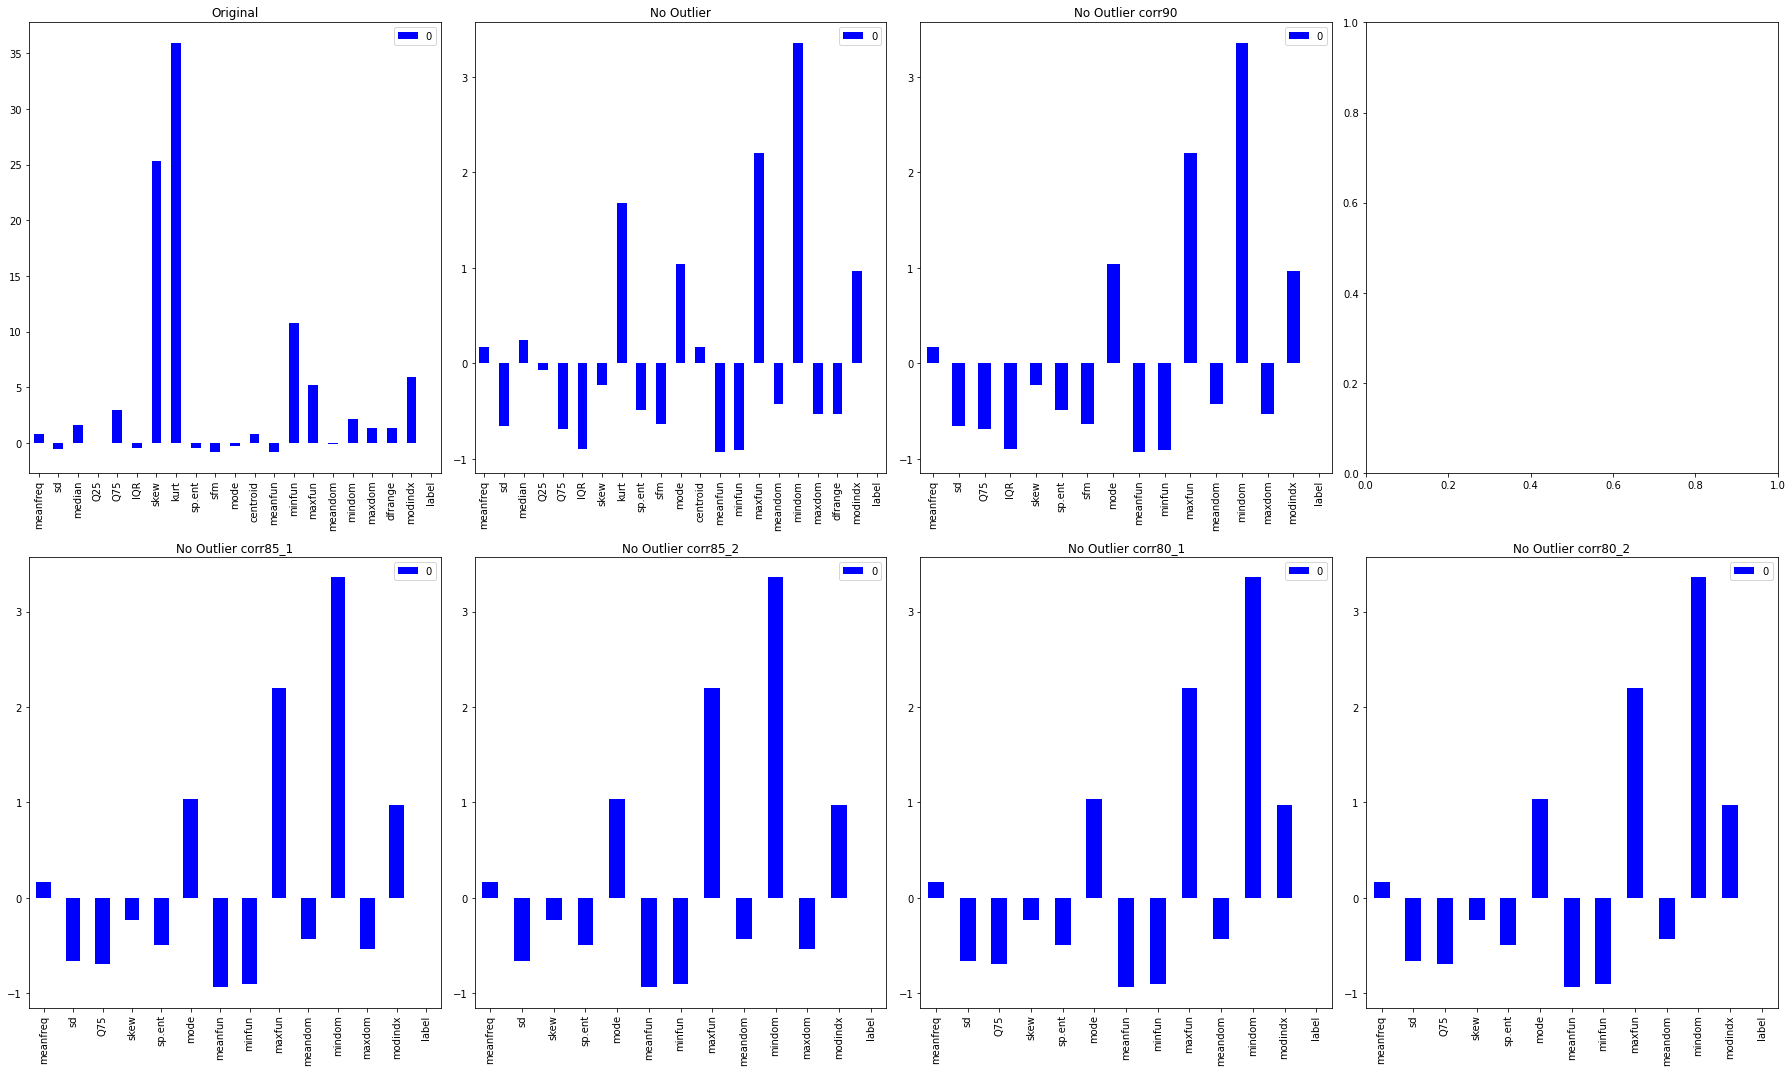

In [45]:
#Plotting kurtosis of various data transformations done above
fig,ax=plt.subplots(nrows=2, ncols=4, figsize=(25, 15), sharex=False, sharey=False)
pd.DataFrame(df_data.kurt(), index=df_data.columns).plot(kind='bar', ax=ax[0,0], color='b')
ax[0,0].set_title('Original')
pd.DataFrame(df_data_numeric_nout.kurt(), index=df_data_numeric_nout.columns).plot(kind='bar', ax=ax[0,1] , color='b')
ax[0,1].set_title('No Outlier')
pd.DataFrame(df_data_1.kurt(), index=df_data_1.columns).plot(kind='bar', ax=ax[0,2], color='b')
ax[0,2].set_title('No Outlier corr90')

pd.DataFrame(df_data_2.kurt(), index=df_data_2.columns).plot(kind='bar', ax=ax[1,0] ,color='b')
ax[1,0].set_title('No Outlier corr85_1')
pd.DataFrame(df_data_3.kurt(), index=df_data_3.columns).plot(kind='bar', ax=ax[1,1],color='b')
ax[1,1].set_title('No Outlier corr85_2')
pd.DataFrame(df_data_4.kurt(), index=df_data_4.columns).plot(kind='bar', ax=ax[1,2] ,color='b')
ax[1,2].set_title('No Outlier corr80_1')
pd.DataFrame(df_data_4.kurt(), index=df_data_4.columns).plot(kind='bar', ax=ax[1,3] ,color='b')
ax[1,3].set_title('No Outlier corr80_2')

plt.tight_layout()
plt.savefig("Kurt_no_outlier_no_corr.png")
plt.show()

Kurtosis have been decreased drastically when comparing the data with and without outliers especially of skew and kurt from around 25-35 to around 3.

Though removal of highly correlated columns does not have much impact further, as values remains similar.

<a id = Section14></a>
# 14. Data Post-profiling

In [105]:
report = pandas_profiling.ProfileReport(df_data_numeric_nout)
report.to_file("Pre_profiling_gender_recog_nooutlier.html")

In [106]:
report = pandas_profiling.ProfileReport(df_data_1)
report.to_file("Pre_profiling_gender_recog_nooutlier_corr90.html")

In [107]:
report = pandas_profiling.ProfileReport(df_data_2)
report.to_file("Pre_profiling_gender_recog_nooutlier_corr85_1.html")

In [108]:
report = pandas_profiling.ProfileReport(df_data_3)
report.to_file("Pre_profiling_gender_recog_nooutlier_corr85_2.html")

In [109]:
report = pandas_profiling.ProfileReport(df_data_4)
report.to_file("Pre_profiling_gender_recog_nooutlier_corr80_1.html")

In [110]:
report = pandas_profiling.ProfileReport(df_data_5)
report.to_file("Pre_profiling_gender_recog_nooutlier_corr80_2.html")

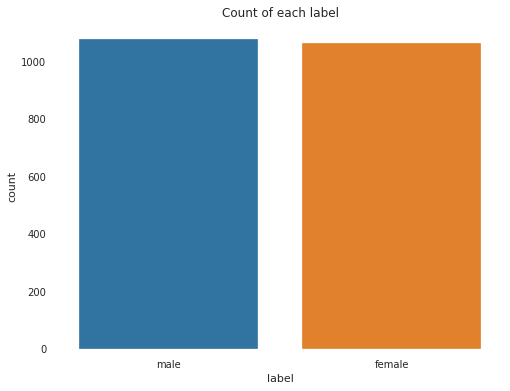

In [170]:
sns.countplot(x='label', data=df_data_numeric_nout)
plt.title("Count of each label")
plt.savefig("Ouptut_label_distribution_after_outlier.png")
plt.show()


After removing outliers

- Correlated columns warnings reduced due to outlier removal.
- dfrange and modindx zero values warnings removed, also mode field zero values percent reduced from 7% to 2%.
- Kurtosis values have been decreased for all the columns especially skew and kurt fields values reduced significantly from around 25 to around 2.
- Label equality though have been compromised, from 1584 each, changed to 1081 male and 1066 female.
- Still some columns with high correlation - kurt/skew, centrid/meanfreq,dfrange/maxdom.


On further removing highly correlated columns after outlier removal 

- No correlation warnings, no highly correlated columns.
- mode still has around 2% zeroes
- No vsible impact on kurtosis or skewness after removal of various highly correlated columns




Since not much difference observed in data with 90% , 80% and 85% correlation removed as per profiling report.

So, further experiment would be on following datasets-

- df_data_numeric_nout - data after outliers removed
- df_data_1 - data after outliers and highly correlated columns(90%) removed

<a id = Section15></a>
# 15. Data Modelling

<a id = Section151></a>
## 15.1 Determining the appropriate number of components for PCA

Checking the number of components for each set of data processed above each time using Scaling and Normalization

In [0]:
def get_PCA_components(df, scalerfn):

  X=df.drop('label', axis=1)
  y=df['label']

  sc=scalerfn()
  X_sc=sc.fit_transform(X)
  pca=PCA(0.95).fit(X_sc)

  print("Components", pca.n_components_)
  print("Explained Variance", pca.explained_variance_ratio_)

  var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
  plt.ylabel('% Variance Explained')
  plt.xlabel('Number of features')
  plt.title('PCA analysis')
  plt.ylim(30,100.5)
  plt.style.context('seaborn-whitegrid')
  plt.plot(var)

Components 10
Explained Variance [0.42167664 0.16079001 0.09096772 0.08237356 0.04338694 0.03958922
 0.03915206 0.03398084 0.02721652 0.02427358]


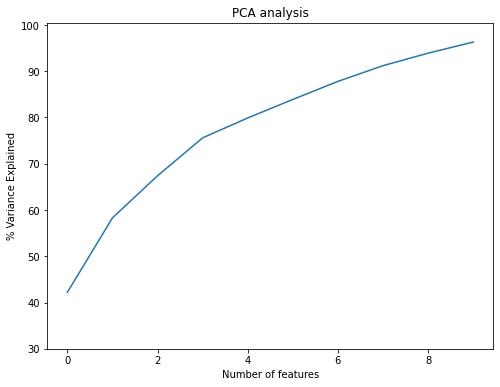

In [47]:
# Data with no outlier 
get_PCA_components(df_data_numeric_nout, MinMaxScaler)
plt.savefig("PCA-no_outlier_data_scaled.png")
plt.show()

So, 10 components explained around total of 96% of explained variance

Components 2
Explained Variance [0.93738184 0.03318398]


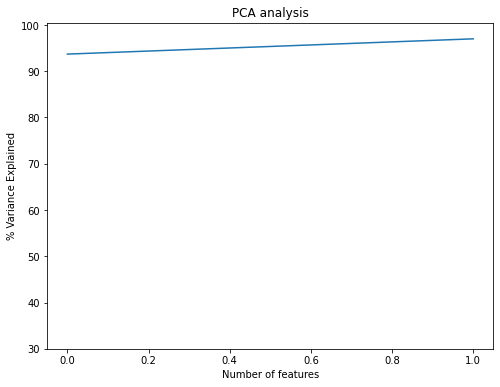

In [48]:
# Data with no outlier 
get_PCA_components(df_data_numeric_nout, Normalizer)
plt.savefig("PCA-no_outlier_data_normalize.png")
plt.show()

So, 2 components explained around total of 96% of explained variance

Components 10
Explained Variance [0.39507964 0.1768392  0.09327712 0.07208642 0.05233819 0.04967574
 0.04309138 0.03154712 0.02994683 0.02816585]


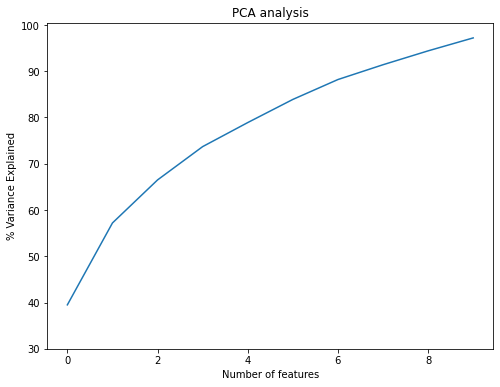

In [49]:
# Data with no outlier and 90% correlation
get_PCA_components(df_data_1, MinMaxScaler)
plt.savefig("PCA-no_outlier_data_90_scaled.png")
plt.show()

So, 10 components explained around total of 96% of explained variance

Components 3
Explained Variance [0.89624592 0.05091356 0.0258502 ]


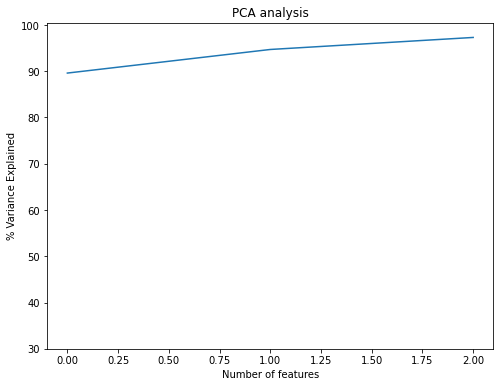

In [50]:
# Data with no outlier and 90% correlation
get_PCA_components(df_data_1, Normalizer)
plt.savefig("PCA-no_outlier_data_90_normalize.png")
plt.show()

3 components explained the total of 97% variance

 - For data with no outlier, number of components - 10 and 2 will be used for PCA

- For data with no outlier and with 90% correlation, number of components - 10 and 3 will be used for PCA


<a id = Section152></a>
## 15.2 Pipelines for ML models training and prediction - baseline models

Since we are experimenting on 6 datasets with multiple combinations, so train test split and ML pipeline would be created on each of the datasets

First will train the datasets -  df_data_numeric_nout and df_data_1 with default Models(no grid search) to get the information on best models and select benchmark on the prediction scores before moving to Grid Search

For analyzing the best model, both the classes are important for us  - male should be avoided to indetify as female and vice versa.

So, model with good acccuracy and F1 score can be considered.

In [0]:
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Recall', 'MLA Precision', 'MLA F1 Score']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#Feature_Importance = {}

def train_predict_default_ml(df, test_size, num_comp):
  X=df.drop('label', axis=1)
  y=df['label']

  le=LabelEncoder()
  y_le=le.fit_transform(y.values.ravel())

  X_train, X_test, y_train, y_test = train_test_split(X, y_le, test_size = test_size, random_state = 0)  
  print(X_train.shape)
  print(X_test.shape)
  print(y_train.shape)
  print(y_test.shape)

  #cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 )
  
  row_index=0
  best_accuracy=0
  best_recall=0
  best_precision=0
  best_f1=0

  #Logistic Regression
  pipe_lr_1=Pipeline([('scaler1', MinMaxScaler()),
                   ('dim_red1', SelectKBest(score_func=chi2, k=10)),
                   ('classifier1', LogisticRegressionCV(cv=10, random_state=0))])
  pipe_lr_2=Pipeline([('scaler2', MinMaxScaler()),
                   ('dim_red2', SelectKBest(score_func=chi2, k=15)),
                   ('classifier2', LogisticRegressionCV(cv=10, random_state=0))])
  pipe_lr_3=Pipeline([('scaler3', MinMaxScaler()),
                   ('dim_red3', PCA(n_components=num_comp)),
                   ('classifier3', LogisticRegressionCV(cv=10, random_state=0))])
  pipe_lr_4=Pipeline([('scaler4', Normalizer()),
                   ('dim_red4', SelectKBest(score_func=chi2, k=10)),
                   ('classifier4', LogisticRegressionCV(cv=10, random_state=0))])
  pipe_lr_5=Pipeline([('scaler5', Normalizer()),
                   ('dim_red5', SelectKBest(score_func=chi2, k=15)),
                   ('classifier5', LogisticRegressionCV(cv=10, random_state=0))])
  pipe_lr_6=Pipeline([('scaler6', Normalizer()),
                   ('dim_red6', PCA(n_components=num_comp)),
                   ('classifier6', LogisticRegressionCV(cv=10, random_state=0))])
  pipe_lr_7=Pipeline([('scaler7', MinMaxScaler()),
                   ('classifier7', LogisticRegressionCV(cv=10, random_state=0))])
  pipe_lr_8=Pipeline([('scaler8', Normalizer()),
                   ('classifier8', LogisticRegressionCV(cv=10, random_state=0))])
  
  #Decision Tree
  pipe_dt_1=Pipeline([('scaler9', MinMaxScaler()),
                   ('dim_red9', SelectKBest(score_func=chi2, k=10)),
                   ('classifier9', DecisionTreeClassifier(random_state=0))])
  pipe_dt_2=Pipeline([('scaler10', MinMaxScaler()),
                   ('dim_red10', SelectKBest(score_func=chi2, k=15)),
                   ('classifier10', DecisionTreeClassifier(random_state=0))])
  pipe_dt_3=Pipeline([('scaler11', MinMaxScaler()),
                   ('dim_red11', PCA(n_components=num_comp)),
                   ('classifier11', DecisionTreeClassifier(random_state=0))])
  pipe_dt_4=Pipeline([('scaler12', Normalizer()),
                   ('dim_red12', SelectKBest(score_func=chi2, k=10)),
                   ('classifier12', DecisionTreeClassifier(random_state=0))])
  pipe_dt_5=Pipeline([('scaler13', Normalizer()),
                   ('dim_red13', SelectKBest(score_func=chi2, k=15)),
                   ('classifier13', DecisionTreeClassifier(random_state=0))])
  pipe_dt_6=Pipeline([('scaler14', Normalizer()),
                   ('dim_red14', PCA(n_components=num_comp)),
                   ('classifier14', DecisionTreeClassifier(random_state=0))])
  pipe_dt_7=Pipeline([('scaler15', MinMaxScaler()),
                   ('classifier15', DecisionTreeClassifier(random_state=0))])
  pipe_dt_8=Pipeline([('scaler16', Normalizer()),
                   ('classifier16', DecisionTreeClassifier(random_state=0))])
  
  #Random Forest
  pipe_rf_1=Pipeline([('scaler17', MinMaxScaler()),
                   ('dim_red17', SelectKBest(score_func=chi2, k=10)),
                   ('classifier17', RandomForestClassifier(random_state=0))])
  pipe_rf_2=Pipeline([('scaler18', MinMaxScaler()),
                   ('dim_red18', SelectKBest(score_func=chi2, k=15)),
                   ('classifier18', RandomForestClassifier(random_state=0))])
  pipe_rf_3=Pipeline([('scaler19', MinMaxScaler()),
                   ('dim_red19', PCA(n_components=num_comp)),
                   ('classifier19', RandomForestClassifier(random_state=0))])
  pipe_rf_4=Pipeline([('scaler20', Normalizer()),
                   ('dim_red20', SelectKBest(score_func=chi2, k=10)),
                   ('classifier20', RandomForestClassifier(random_state=0))])
  pipe_rf_5=Pipeline([('scaler21', Normalizer()),
                   ('dim_red21', SelectKBest(score_func=chi2, k=15)),
                   ('classifier21', RandomForestClassifier(random_state=0))])
  pipe_rf_6=Pipeline([('scaler22', Normalizer()),
                   ('dim_red22', PCA(n_components=num_comp)),
                   ('classifier22', RandomForestClassifier(random_state=0))])
  pipe_rf_7=Pipeline([('scaler23', MinMaxScaler()),
                   ('classifier23', RandomForestClassifier(random_state=0))])
  pipe_rf_8=Pipeline([('scaler24', Normalizer()),
                   ('classifier24', RandomForestClassifier(random_state=0))])
  
  #KNN
  pipe_kn_1=Pipeline([('scaler25', MinMaxScaler()),
                   ('dim_red25', SelectKBest(score_func=chi2, k=10)),
                   ('classifier25', KNeighborsClassifier(n_jobs=-1))])
  pipe_kn_2=Pipeline([('scaler26', MinMaxScaler()),
                   ('dim_red26', SelectKBest(score_func=chi2, k=15)),
                   ('classifier26', KNeighborsClassifier(n_jobs=-1))])
  pipe_kn_3=Pipeline([('scaler27', MinMaxScaler()),
                   ('dim_red27', PCA(n_components=num_comp)),
                   ('classifier27', KNeighborsClassifier(n_jobs=-1))])
  pipe_kn_4=Pipeline([('scaler28', Normalizer()),
                   ('dim_red28', SelectKBest(score_func=chi2, k=10)),
                   ('classifier28', KNeighborsClassifier(n_jobs=-1))])
  pipe_kn_5=Pipeline([('scaler29', Normalizer()),
                   ('dim_red29', SelectKBest(score_func=chi2, k=15)),
                   ('classifier29', KNeighborsClassifier(n_jobs=-1))])
  pipe_kn_6=Pipeline([('scaler30', Normalizer()),
                   ('dim_red30', PCA(n_components=num_comp)),
                   ('classifier30', KNeighborsClassifier(n_jobs=-1))])
  pipe_kn_7=Pipeline([('scaler31', MinMaxScaler()),
                   ('classifier31', KNeighborsClassifier(n_jobs=-1))])
  pipe_kn_8=Pipeline([('scaler32', Normalizer()),
                   ('classifier32', KNeighborsClassifier(n_jobs=-1))])
  
  #SVC
  pipe_svc_1=Pipeline([('scaler33', MinMaxScaler()),
                   ('dim_red33', SelectKBest(score_func=chi2, k=10)),
                   ('classifier33', SVC(random_state=0))])
  pipe_svc_2=Pipeline([('scaler34', MinMaxScaler()),
                   ('dim_red34', SelectKBest(score_func=chi2, k=15)),
                   ('classifier34', SVC(random_state=0))])
  pipe_svc_3=Pipeline([('scaler35', MinMaxScaler()),
                   ('dim_red35', PCA(n_components=num_comp)),
                   ('classifier35', SVC(random_state=0))])
  pipe_svc_4=Pipeline([('scaler36', Normalizer()),
                   ('dim_red36', SelectKBest(score_func=chi2, k=10)),
                   ('classifier36', SVC(random_state=0))])
  pipe_svc_5=Pipeline([('scaler37', Normalizer()),
                   ('dim_red37', SelectKBest(score_func=chi2, k=15)),
                   ('classifier37', SVC(random_state=0))])
  pipe_svc_6=Pipeline([('scaler38', Normalizer()),
                   ('dim_red38', PCA(n_components=num_comp)),
                   ('classifier38', SVC(random_state=0))])
  pipe_svc_7=Pipeline([('scaler39', MinMaxScaler()),
                   ('classifier39', SVC(random_state=0))])
  pipe_svc_8=Pipeline([('scaler40', Normalizer()),
                   ('classifier40', SVC(random_state=0))])

  #Naive Bayes
  pipe_nb_1=Pipeline([('scaler41', MinMaxScaler()),
                   ('dim_red41', SelectKBest(score_func=chi2, k=10)),
                   ('classifier41', GaussianNB())])
  pipe_nb_2=Pipeline([('scaler42', MinMaxScaler()),
                   ('dim_red42', SelectKBest(score_func=chi2, k=15)),
                   ('classifier42', GaussianNB())])
  pipe_nb_3=Pipeline([('scaler43', MinMaxScaler()),
                   ('dim_red43', PCA(n_components=num_comp)),
                   ('classifier43', GaussianNB())])
  pipe_nb_4=Pipeline([('scaler44', Normalizer()),
                   ('dim_red44', SelectKBest(score_func=chi2, k=10)),
                   ('classifier45', GaussianNB())])
  pipe_nb_5=Pipeline([('scaler46', Normalizer()),
                   ('dim_red46', SelectKBest(score_func=chi2, k=15)),
                   ('classifier46', GaussianNB())])
  pipe_nb_6=Pipeline([('scaler47', Normalizer()),
                   ('dim_red47', PCA(n_components=num_comp)),
                   ('classifier47', GaussianNB())])
  pipe_nb_7=Pipeline([('scaler48', MinMaxScaler()),
                   ('classifier48', GaussianNB())])
  pipe_nb_8=Pipeline([('scaler49', Normalizer()),
                   ('classifier49', GaussianNB())])

  pipelines=[pipe_lr_1,pipe_lr_2,pipe_lr_3,pipe_lr_4,pipe_lr_5,pipe_lr_6,pipe_lr_7,pipe_lr_8,
             pipe_dt_1,pipe_dt_2,pipe_dt_3,pipe_dt_4,pipe_dt_5,pipe_dt_6,pipe_dt_7,pipe_dt_8,
             pipe_rf_1,pipe_rf_2,pipe_rf_3,pipe_rf_4,pipe_rf_5,pipe_rf_6,pipe_rf_7,pipe_rf_8,
             pipe_kn_1,pipe_kn_2,pipe_kn_3,pipe_kn_4,pipe_kn_5,pipe_kn_6,pipe_kn_7,pipe_kn_8,
             pipe_svc_1,pipe_svc_2,pipe_svc_3,pipe_svc_4,pipe_svc_5,pipe_svc_6,pipe_svc_7,pipe_svc_8,
             pipe_nb_1,pipe_nb_2,pipe_nb_3,pipe_nb_4,pipe_nb_5,pipe_nb_6,pipe_nb_7,pipe_nb_8]
  pipe_dict={0:'Logistic Regression', 1:'Decision Tree Classifier', 2:'Random Forest Classifier', 3:'KNN', 4:'SVC', 5:'Naive Bayes'}

  for pipe in pipelines:
    pipe.fit(X_train, y_train)

  for i,model in enumerate(pipelines):
    if (i>=0 and i<=7):
      MLA_compare.loc[row_index, 'MLA Name']=pipe_dict[0]
    elif (i>=8 and i<=15):
      MLA_compare.loc[row_index, 'MLA Name']=pipe_dict[1]
    elif (i>=16 and i<=23):
      MLA_compare.loc[row_index, 'MLA Name']=pipe_dict[2]
    elif (i>=24 and i<=31):
      MLA_compare.loc[row_index, 'MLA Name']=pipe_dict[3]
    elif (i>=32 and i<=39):
      MLA_compare.loc[row_index, 'MLA Name']=pipe_dict[4]
    else:
      MLA_compare.loc[row_index, 'MLA Name']=pipe_dict[5]

    MLA_compare.loc[row_index, 'MLA Parameters']=str(model.get_params())
    
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean']=model.score(X_train,y_train)
    
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean']=model.score(X_test,y_test)
    
    y_pred = model.predict(X_test)
    
    MLA_compare.loc[row_index, 'MLA Recall']=metrics.recall_score(y_test, y_pred)
    
    MLA_compare.loc[row_index, 'MLA Precision']=metrics.precision_score(y_test, y_pred)
    
    MLA_compare.loc[row_index, 'MLA F1 Score']=metrics.f1_score(y_test, y_pred)
    
    row_index=row_index+1


    if (model.score(X_test,y_test)>best_accuracy):
      best_accuracy=model.score(X_test,y_test)
      best_accpipeline=model
  
    if (metrics.recall_score(y_test, y_pred)>best_recall):
      best_recall=metrics.recall_score(y_test, y_pred)
      bestrecpipeline=model

    if (metrics.precision_score(y_test, y_pred)>best_precision):
      best_precision=metrics.precision_score(y_test, y_pred)
      bestprcpipeline=model

    if (metrics.f1_score(y_test, y_pred)>best_f1):
      best_f1=metrics.f1_score(y_test, y_pred)
      bestf1pipeline=model

  MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
  MLA_compare.reset_index(drop=True, inplace=True)
  MLA_compare['Difference']= (MLA_compare['MLA Test Accuracy Mean']-MLA_compare['MLA Train Accuracy Mean'])*100

  print("\nBest Model for accuracy :\n", best_accpipeline)
  print("--------------------------------------------------")
  print("--------------------------------------------------")
  print("\nBest Model for recall :\n", bestrecpipeline)
  print("--------------------------------------------------")
  print("--------------------------------------------------")
  print("\nBest Model for precision :\n", bestprcpipeline)
  print("--------------------------------------------------")
  print("--------------------------------------------------")
  print("\nBest Model for f1score :\n", bestf1pipeline)

  return MLA_compare

### Data with no outlier and PCA with 10 components

In [252]:
MLA_compare1=train_predict_default_ml(df_data_numeric_nout, .20, 10)
MLA_compare1.head()

(1717, 20)
(430, 20)
(1717,)
(430,)

Best Model for accuracy :
 Pipeline(memory=None,
         steps=[('scaler35', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('dim_red35',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classifier35',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=0, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
--------------------------------------------------
--------------------------------------------------

Best Model for recall :
 Pipeline(memory=None,
         steps=[('scaler31', MinMaxScaler(copy=True, feature_range=(0, 1))),
       

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Recall,MLA Precision,MLA F1 Score,Difference
0,SVC,"{'memory': None, 'steps': [('scaler35', MinMax...",0.98544,0.981395,0.968037,0.995305,0.981481,-0.404437
1,SVC,"{'memory': None, 'steps': [('scaler39', MinMax...",0.98544,0.97907,0.968037,0.990654,0.979215,-0.636995
2,SVC,"{'memory': None, 'steps': [('scaler34', MinMax...",0.981363,0.97907,0.977169,0.981651,0.979405,-0.229307
3,Logistic Regression,"{'memory': None, 'steps': [('scaler1', MinMaxS...",0.973209,0.974419,0.96347,0.985981,0.974596,0.120952
4,Logistic Regression,"{'memory': None, 'steps': [('scaler7', MinMaxS...",0.976704,0.974419,0.96347,0.985981,0.974596,-0.228495


**MinMaxScaler(copy=True, feature_range=(0, 1)**

**PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)**

**SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=0, shrinking=True,
                     tol=0.001, verbose=False)**

The above model set can be preferred as it has highest F1 score (.981) and accuracy (.9813) , with Recall(.9680) and Precision(.9953) is also seems good.

Morever, the difference in train and test accuracy is around -0.40, so no underfit/overfit issue with this model.

### Data with no outlier and PCA with 2 components

In [253]:
MLA_compare2=train_predict_default_ml(df_data_numeric_nout, .20, 2)
MLA_compare2.head()

(1717, 20)
(430, 20)
(1717,)
(430,)

Best Model for accuracy :
 Pipeline(memory=None,
         steps=[('scaler34', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('dim_red34',
                 SelectKBest(k=15,
                             score_func=<function chi2 at 0x7f22d9565158>)),
                ('classifier34',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=0, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
--------------------------------------------------
--------------------------------------------------

Best Model for recall :
 Pipeline(memory=None,
         steps=[('scaler31', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('classifier31',
                 KNeighborsClassifier(a

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Recall,MLA Precision,MLA F1 Score,Difference
0,SVC,"{'memory': None, 'steps': [('scaler39', MinMax...",0.98544,0.97907,0.968037,0.990654,0.979215,-0.636995
1,SVC,"{'memory': None, 'steps': [('scaler34', MinMax...",0.981363,0.97907,0.977169,0.981651,0.979405,-0.229307
2,Logistic Regression,"{'memory': None, 'steps': [('scaler1', MinMaxS...",0.973209,0.974419,0.96347,0.985981,0.974596,0.120952
3,SVC,"{'memory': None, 'steps': [('scaler33', MinMax...",0.981363,0.974419,0.968037,0.981481,0.974713,-0.694424
4,Logistic Regression,"{'memory': None, 'steps': [('scaler7', MinMaxS...",0.976704,0.974419,0.96347,0.985981,0.974596,-0.228495


**MinMaxScaler(copy=True, feature_range=(0, 1))**

**SelectKBest(k=15,score_func=<function chi2 at 0x7f22d9565158>)**

**SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=0, shrinking=True,
                     tol=0.001, verbose=False)**

The above model set can be preferred as it has highest F1 score (.9794) and accuracy (.9790) , with Recall(.9771) and Precision(.9815) is also seems good.

Morever, the difference in train and test accuracy is around -0.22, so no underfit/overfit issue with this model.

### Data with no outlier and highly correlated columns and PCA with 10 components

In [254]:
MLA_compare3=train_predict_default_ml(df_data_1, .20, 10)
MLA_compare3.head()

(1717, 15)
(430, 15)
(1717,)
(430,)

Best Model for accuracy :
 Pipeline(memory=None,
         steps=[('scaler35', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('dim_red35',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classifier35',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=0, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
--------------------------------------------------
--------------------------------------------------

Best Model for recall :
 Pipeline(memory=None,
         steps=[('scaler26', MinMaxScaler(copy=True, feature_range=(0, 1))),
       

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Recall,MLA Precision,MLA F1 Score,Difference
0,SVC,"{'memory': None, 'steps': [('scaler35', MinMax...",0.987769,0.97907,0.968037,0.990654,0.979215,-0.86996
1,SVC,"{'memory': None, 'steps': [('scaler34', MinMax...",0.98544,0.976744,0.96347,0.99061,0.976852,-0.869553
2,SVC,"{'memory': None, 'steps': [('scaler33', MinMax...",0.980198,0.976744,0.977169,0.977169,0.977169,-0.345383
3,SVC,"{'memory': None, 'steps': [('scaler39', MinMax...",0.98544,0.976744,0.96347,0.99061,0.976852,-0.869553
4,Logistic Regression,"{'memory': None, 'steps': [('scaler5', Normali...",0.974956,0.974419,0.96347,0.985981,0.974596,-0.0537715


**MinMaxScaler(copy=True, feature_range=(0, 1)**

**PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)**

**SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=0, shrinking=True,
                     tol=0.001, verbose=False)**

The above model set can be preferred as it has highest F1 score (.979) and accuracy (.9790) , with Recall(.9683) and Precision(.9905) is also seems good.

Morever, the difference in train and test accuracy is around -0.8699, so less chance of  underfit/overfit issue with this model.

### Data with no outlier and highly correlated columns and PCA with 3 components

In [256]:
MLA_compare4=train_predict_default_ml(df_data_1, .20, 3)
MLA_compare4.head()

(1717, 15)
(430, 15)
(1717,)
(430,)

Best Model for accuracy :
 Pipeline(memory=None,
         steps=[('scaler33', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('dim_red33',
                 SelectKBest(k=10,
                             score_func=<function chi2 at 0x7f22d9565158>)),
                ('classifier33',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=0, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
--------------------------------------------------
--------------------------------------------------

Best Model for recall :
 Pipeline(memory=None,
         steps=[('scaler26', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('dim_red26',
                 SelectKBest(k=15,
       

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Recall,MLA Precision,MLA F1 Score,Difference
0,SVC,"{'memory': None, 'steps': [('scaler39', MinMax...",0.98544,0.976744,0.96347,0.99061,0.976852,-0.869553
1,SVC,"{'memory': None, 'steps': [('scaler34', MinMax...",0.98544,0.976744,0.96347,0.99061,0.976852,-0.869553
2,SVC,"{'memory': None, 'steps': [('scaler33', MinMax...",0.980198,0.976744,0.977169,0.977169,0.977169,-0.345383
3,Logistic Regression,"{'memory': None, 'steps': [('scaler5', Normali...",0.974956,0.974419,0.96347,0.985981,0.974596,-0.0537715
4,Logistic Regression,"{'memory': None, 'steps': [('scaler8', Normali...",0.974956,0.974419,0.96347,0.985981,0.974596,-0.0537715


**MinMaxScaler(copy=True, feature_range=(0, 1)**

**SelectKBest(k=15,score_func=<function chi2 at 0x7f22d9565158>)**

**SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=0, shrinking=True,
                     tol=0.001, verbose=False)**

The above model set can be preferred as it has highest F1 score (.977) and accuracy (.976), with Recall(.977) and Precision(.977) is also seems good.

Morever, the difference in train and test accuracy is around -0.34, so less chance of  underfit/overfit issue with this model.

<a id = Section1521></a>
### 15.2.1 Observation from baseline models performance

### For data with no outliers but highly correlated columns not removed

SVC with PCA of compoents=10 performed marginally better than SVC with selectKBest, however, SVC with selectKBest has less difference in test and train accuracy as compared with PCA.

**SVC + PCA**

F1 score- .981

Test accuracy - .9813

Recall - .9680

Precison - .9953

Difference in test and train accuracy - -0.40


**SVC + selectKBest**

F1 score- .9794

Test accuracy - .9790

Recall - .9771

Precison - .9815

Difference in test and train accuracy - -0.22


So, both the models performed almost similar if all parameters are taken into account, so if need marginally better accuracy we can select SVC+PCA and if we want marginally less difference we can select SVC+selectKBest

But, in our case we can opt for SVC + selectKBest as benchamrk for this data, as scores and accuracy and other values almost simialr but lower difference in test and train could be significant when live data testing is considered, so one with less difference and still with good score and  accuracy is better choice.

**SVC + selectKBest for df_data_numeric_nout**

### For data with no outliers and highly correlated columns also removed

SVC with SelectKBest has performed better if we consider all parameters.

**SVC + PCA**

F1 score- .979

Test accuracy - .9790

Recall - .9683

Precison - .9905

Difference in test and train accuracy - -0.8699


**SVC + selectKBest**

F1 score- .977

Test accuracy - .976

Recall - .977

Precison - .977

Difference in test and train accuracy - -0.34

SVC and PCA may have marginally higher score and accuracy, but the difference in test and train is -.8699 as compared to the model with selectKBest which has -0.34

So, SVC+selectKBest can be considered for this dataset as benchmark

**SVC + selectKBest for df_data_1**

<a id = Section153></a>
## 15.3 Pipelines for ML models training and prediction - Parameterized models

After default modelling above, we can play with parameters and verify if any better results.

In [0]:
def train_predict_ml_model_param(X_train, y_train, ref_score):
 
  #Initialize the pipeline with any estimator you like
  pipe=Pipeline(steps=[('classifier', RandomForestClassifier())])
  param_grid=[{
                  'classifier':[LogisticRegressionCV()],
                  'classifier__penalty' : ['l1', 'l2'],
                  'classifier__cv' : range(5,20,5),
                  'classifier__solver' : ['liblinear','sag','saga'],
                  'classifier__random_state':[0]
                },
               {
                  'classifier':[DecisionTreeClassifier()],
                  'classifier__criterion':['gini','entropy'],
                  'classifier__splitter':['best','random'],
                  'classifier__max_depth':range(2,20,2),
                  'classifier__min_samples_split':range(2,1000, 10),
                  'classifier__min_samples_leaf':range(1,20, 1),
                  'classifier__max_features':['auto','sqrt','log2'],
                  'classifier__random_state':[0]
               },
               {
                  'classifier':[RandomForestClassifier()],
                  'classifier__n_estimators': [10, 100, 1000],
                  'classifier__criterion':['gini','entropy'],
                  'classifier__max_depth':range(2,20,2),
                  'classifier__min_samples_split':range(2,1000, 10),
                  'classifier__min_samples_leaf':range(1,20, 1),
                  'classifier__max_features':['auto','sqrt','log2'],
                  'classifier__random_state':[0]
               },
               {
                  'classifier':[KNeighborsClassifier()],
                  'classifier__n_neighbors':range(1, 21, 2),
                  'classifier__weights':['uniform', 'distance'],
                  'classifier__metric':['euclidean', 'manhattan', 'minkowski'],
                  'classifier__algorithm':['auto','ball_tree','kd_tree','brute'],
                  'classifier__n_jobs':[-1]
               },
               {
                   'classifier':[SVC()],
                   'classifier__kernel':['poly', 'rbf', 'sigmoid'],
                   'classifier__C':[50, 10, 1.0, 0.1, 0.01],
                   'classifier__gamma':['scale','auto']
               },
               {
                   'classifier':[GaussianNB()],
               },
  ]
  scorers = {
    'precision_score': metrics.make_scorer(metrics.precision_score),
    'recall_score': metrics.make_scorer(metrics.recall_score),
    'accuracy_score': metrics.make_scorer(metrics.accuracy_score),
    'f1_score': metrics.make_scorer(metrics.f1_score)
  }
  #clf = GridSearchCV(pipe, param_grid = param_grid, cv =3, verbose=True, n_jobs=-1)
  clf = RandomizedSearchCV(pipe, n_iter=10, param_distributions = param_grid, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit=ref_score, scoring=scorers)

  best_clf = clf.fit(X_train, y_train)

  return best_clf


In [0]:
#df  -> input dataframe
#test_size -> test size data to split upon
# n -> number of components for PCA or SelectKBest
#flag -> 0 - SelectKBest, 1 - PCA
def predict_gridsearch_result(df, test_siz, n, flag, ref_score):

  le=LabelEncoder()
  df['label']=le.fit_transform(df['label'])
  y=df['label']

  X=df.drop('label', axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_siz, random_state = 0)  
  print(X_train.shape)
  print(X_test.shape)
  print(y_train.shape)
  print(y_test.shape)

  scaler=MinMaxScaler()
  X_std_train=scaler.fit_transform(X_train)
  X_std_test=scaler.transform(X_test)

  if (flag==0): #KBEST
    print ("SelectKBest")
    fs=SelectKBest(score_func=chi2, k=n)
    X_new=fs.fit_transform(X_std_train, y_train)
    X_std_test=fs.transform(X_std_test)
  else: #PCA
    print ("PCA")
    pca=PCA(n_components=n, random_state=0)
    X_new=pca.fit_transform(X_std_train)
    X_std_test=pca.transform(X_std_test)

  best_clf=train_predict_ml_model_param(X_new, y_train, ref_score)

  y_pred=best_clf.predict(X_std_test)

  
  y_pred_proba = best_clf.predict_proba(X_std_test)
  preds = y_pred_proba[:,1]
  fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
  roc_auc = metrics.auc(fpr, tpr)
  print(roc_auc)

  plt.figure()
  plt.plot(fpr, tpr, label='AUC ROC (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")

  print(" START BEST MODEL STATS :\n")
  print("Best estimator : \n", best_clf.best_estimator_)
  print("-----------------------------------------")
  print('Model accuracy is :',best_clf.score(X_std_test, y_test))
  print("-----------------------------------------")
  print('Best parameters : \n', best_clf.best_estimator_.get_params())
  print("-----------------------------------------")
  #print('Mean train accuracy : ', best_clf.cv_results_['mean_train_score'].mean())
  print("-----------------------------------------")
  #print('Mean test accuracy : ', best_clf.cv_results_['mean_test_score'].mean())
  print("-----------------------------------------")
  print('Recall : ', metrics.recall_score(y_test, y_pred))
  print("-----------------------------------------")
  print('Precison : ', metrics.precision_score(y_test, y_pred))
  print("-----------------------------------------")
  print('F1 score : ', metrics.f1_score(y_test, y_pred))
  print("-----------------------------------------")
  #print('Train and Test accuracy difference  : ', best_clf.cv_results_['mean_test_score'].mean()- best_clf.cv_results_['mean_train_score'].mean())
  print("-----------------------------------------")
  print('Mean fit Time  : ', best_clf.cv_results_['mean_fit_time'].mean())
  print("-----------------------------------------")
  print('AUC ROC score  : ', roc_auc)
  print("-----------------------------------------")
  print("-----------------------------------------")
  print("Confusion Matrix:\n", pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns=['male','female'], index=['male','female']))
  print("-----------------------------------------")
  print("-----------------------------------------")
  print('Classfication Report : \n', metrics.classification_report(y_test, y_pred))
  print("-----------------------------------------")
  print("-----------------------------------------")
  print(" END BEST MODEL STATS :\n")


  return

### Dataset with no outliers and selectKBest for important features with different scoring values

(1717, 20)
(430, 20)
(1717,)
(430,)
SelectKBest
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.6s finished


0.9912354736090372
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=18, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=4,
                                        min_samples_split=322,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
------------

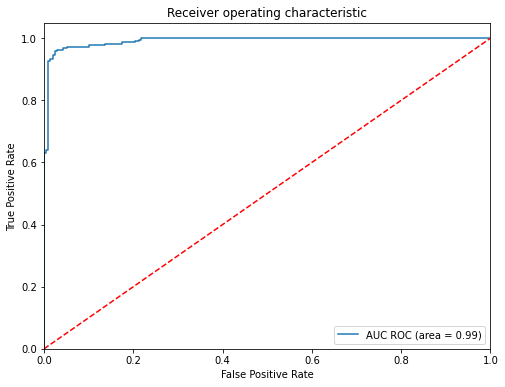

In [201]:
predict_gridsearch_result(df_data_numeric_nout,.20, 15, 0, 'precision_score')
plt.savefig("No_outlier_selecKBest_AUC_ROC_1.png")
plt.show()

(1717, 20)
(430, 20)
(1717,)
(430,)
SelectKBest
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   46.9s finished


0.9869181328312666
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=10, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=9,
                                        min_samples_split=792,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
-----------

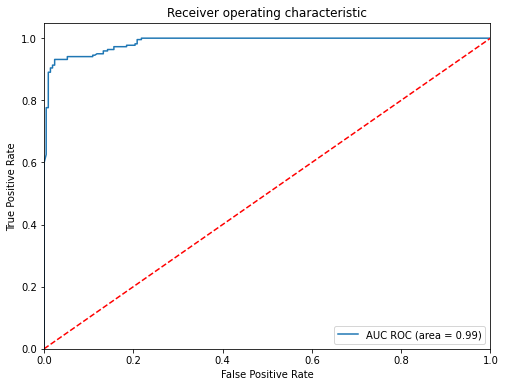

In [202]:
predict_gridsearch_result(df_data_numeric_nout,.20, 15, 0, 'recall_score')
plt.savefig("No_outlier_selecKBest_AUC_ROC_2.png")
plt.show()

(1717, 20)
(430, 20)
(1717,)
(430,)
SelectKBest
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.0s finished


0.9936808846761453
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=8, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=12,
                                        min_samples_split=132,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
--------------

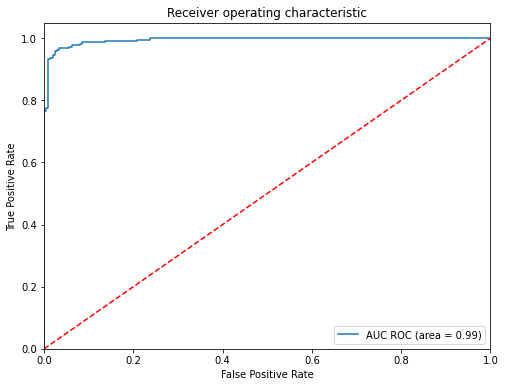

In [203]:
predict_gridsearch_result(df_data_numeric_nout,.20, 15, 0, 'accuracy_score')
plt.savefig("No_outlier_selecKBest_AUC_ROC_3.png")
plt.show()

(1717, 20)
(430, 20)
(1717,)
(430,)
SelectKBest
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.8s finished


0.994481594494579
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=14, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=15,
                                        min_samples_split=142,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
------------

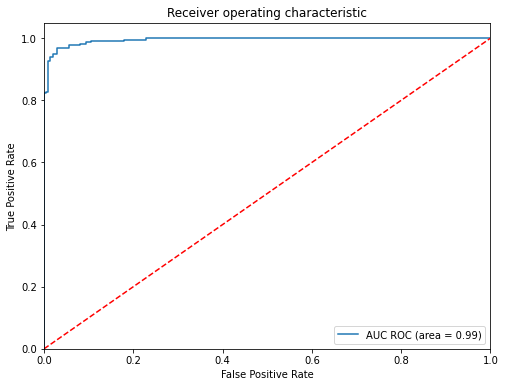

In [204]:
predict_gridsearch_result(df_data_numeric_nout,.20, 15, 0, 'f1_score')
plt.savefig("No_outlier_selecKBest_AUC_ROC_4.png")
plt.show()

No outlier and SelectKBest

- precision score
 
 accuracy 			- 	0.9765
 
 precision			-	0.976
 
 recall				-	0.949
 
 F1 score			-	0.949
 
 AUC ROC score		-	0.99
 
 Fit time			-	0.1259
 
**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=18, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=4,
                                        min_samples_split=322,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**
										
- recall score
 
 accuracy 			- 	0.9726
 
 precision			-	0.8588
 
 recall				-	0.9726
 
 F1 score			-	0.9122
 
 AUC ROC score		-	0.9869
 
 Fit time			-	0.7982
 

**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=10, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=9,
                                        min_samples_split=792,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**
										
- accuracy score
 
 accuracy 			- 	0.9627
 
 precision			-	0.9765
 
 recall				-	0.9497
 
 F1 score			-	0.9629
 
 AUC ROC score		-	0.9869
 
 Fit time			-	0.5193
 

**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=8, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=12,
                                        min_samples_split=132,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**
										
- f1 score
 
 accuracy 			- 	0.9629
 
 precision			-	0.9765
 
 recall				-	0.9497
 
 F1 score			-	0.9629
 
 AUC ROC score		-	0.9944
 
 Fit time			-	0.121
 
 
**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=14, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=15,
                                        min_samples_split=142,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**
										
										

**So, based on above statistics, model based on f1 score is best**						

### Dataset with no outliers and PCA for dim red with different scoring values

(1717, 20)
(430, 20)
(1717,)
(430,)
PCA
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.4s finished


0.9892661602718085
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=4, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=12,
                                        min_samples_split=262,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
--------------

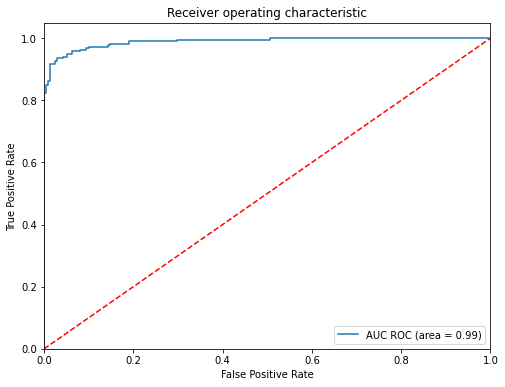

In [205]:
predict_gridsearch_result(df_data_numeric_nout,.20, 10, 1, 'precision_score')
plt.savefig("No_outlier_PCA_AUC_ROC_1.png")
plt.show()

(1717, 20)
(430, 20)
(1717,)
(430,)
PCA
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


0.9886169360947001
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=10, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=16,
                                        min_samples_split=212,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
----------

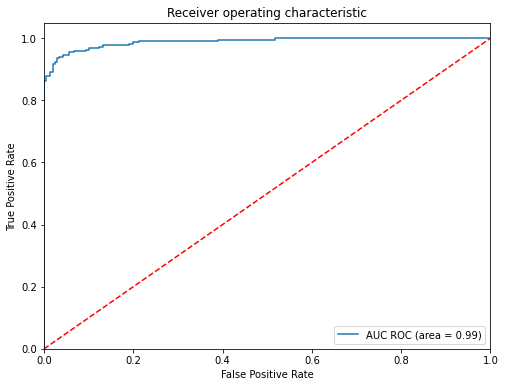

In [206]:
predict_gridsearch_result(df_data_numeric_nout,.20, 10, 1, 'recall_score')
plt.savefig("No_outlier_PCA_AUC_ROC_2.png")
plt.show()

(1717, 20)
(430, 20)
(1717,)
(430,)
PCA
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


0.9925772035750612
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=6, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=8,
                                        min_samples_split=62,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
-------------

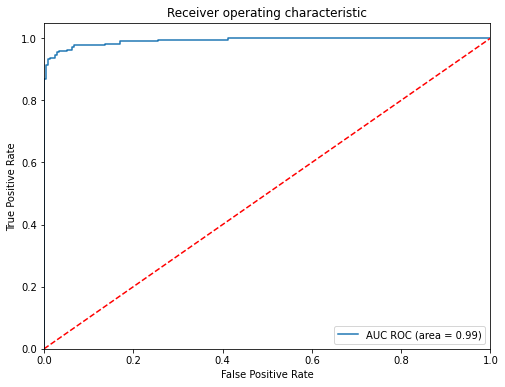

In [207]:
predict_gridsearch_result(df_data_numeric_nout,.20, 10, 1, 'accuracy_score')
plt.savefig("No_outlier_PCA_AUC_ROC_3.png")
plt.show()

(1717, 20)
(430, 20)
(1717,)
(430,)
PCA
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.6s finished


0.9901750741197601
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=10, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=10,
                                        min_samples_split=112,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
-----------

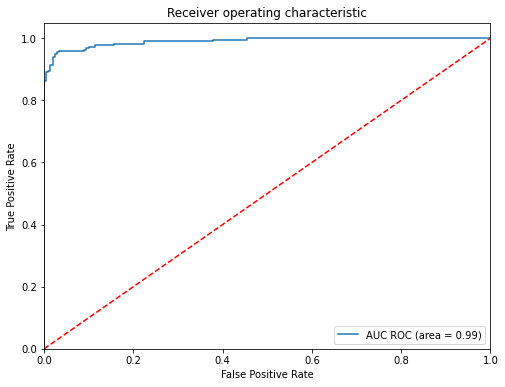

In [208]:
predict_gridsearch_result(df_data_numeric_nout,.20, 10, 1, 'f1_score')
plt.savefig("No_outlier_PCA_AUC_ROC_4.png")
plt.show()

No outlier and PCA

- precision score
 
 accuracy 			- 	0.9375
 
 precision			-	0.9375
 
 recall				-	0.9589
 
 F1 score			-	0.9480
 
 AUC ROC score		-	0.9892
 
 Fit time			-	0.415
 
**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=4, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=12,
                                        min_samples_split=262,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**
										
- recall score
 
 accuracy 			- 	0.9452
 
 precision			-	0.9583
 
 recall				-	0.9452
 
 F1 score			-	0.951
 
 AUC ROC score		-	0.9886
 
 Fit time			-	1.17
 

**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=10, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=16,
                                        min_samples_split=212,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**
										
- accuracy score
 
 accuracy 			- 	0.9604
 
 precision			-	0.9719
 
 recall				-	0.9497
 
 F1 score			-	0.9607
 
 AUC ROC score		-	0.99
 
 Fit time			-	1.501
 

**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=6, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=8,
                                        min_samples_split=62,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**
										
- f1 score
 
 accuracy 			- 	0.9631
 
 precision			-	0.9720
 
 recall				-	0.954
 
 F1 score			-	0.9631
 
 AUC ROC score		-	0.9901
 
 Fit time			-	0.1066
 
 
**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=10, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=10,
                                        min_samples_split=112,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**
										
										

**So, based on above statistics, model based on f1 score is best**						

### Dataset with no outliers and no highly correlated columns and selectKBest for important features with different scoring values

(1717, 15)
(430, 15)
(1717,)
(430,)
SelectKBest
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.4s finished


0.9828388409184358
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=10,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=10,
                                        min_samples_split=372,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=0,
                                        splitter='best'))],
         verbose=False)
-----------------------------------------
Model accuracy is : 0.9855769230769231
-----------------------------------------


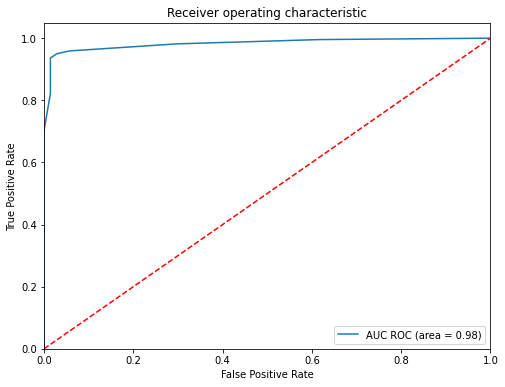

In [209]:
predict_gridsearch_result(df_data_1,.20, 15, 0, 'precision_score')
plt.savefig("No_outlier_no_corr_selecKBest_AUC_ROC_1.png")
plt.show()

(1717, 15)
(430, 15)
(1717,)
(430,)
SelectKBest
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   45.6s finished


0.9855331212534355
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=2, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=16,
                                        min_samples_split=682,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
-------------

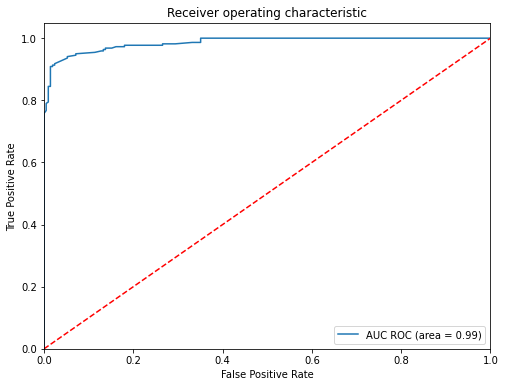

In [210]:
predict_gridsearch_result(df_data_1,.20, 15, 0, 'recall_score')
plt.savefig("No_outlier_no_corr_selecKBest_AUC_ROC_2.png")
plt.show()

(1717, 15)
(430, 15)
(1717,)
(430,)
SelectKBest
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.7s finished


0.9946763617477115
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=16, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=42,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
--------------

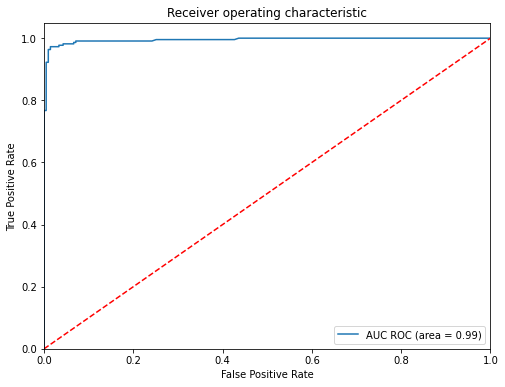

In [211]:
predict_gridsearch_result(df_data_1,.20, 15, 0, 'accuracy_score')
plt.savefig("No_outlier_no_corr_selecKBest_AUC_ROC_3.png")
plt.show()

(1717, 15)
(430, 15)
(1717,)
(430,)
SelectKBest
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


0.996429267025904
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=8, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=7,
                                        min_samples_split=22,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
-----------------

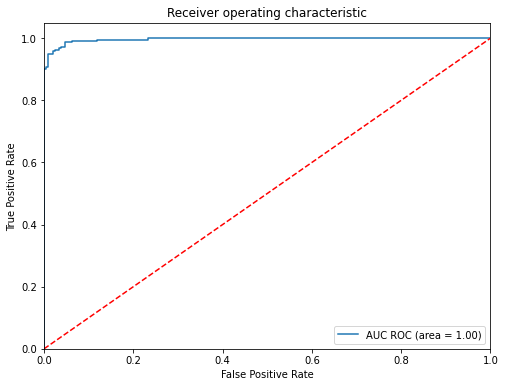

In [212]:
predict_gridsearch_result(df_data_1,.20, 15, 0, 'f1_score')
plt.savefig("No_outlier_no_corr_selecKBest_AUC_ROC_4.png")
plt.show()

No outlier, no high correlation and SelectKBest

- precision score
 
 accuracy 			- 	0.9855
 
 precision			-	0.9855
 
 recall				-	0.9360
 
 F1 score			-	0.9601
 
 AUC ROC score		-	0.9828
 
 Fit time			-	0.3953
 
**DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=10,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=10,
                                        min_samples_split=372,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=0,
                                        splitter='best')**

										
- recall score
 
 accuracy 			- 	0.9726
 
 precision			-	0.8623
 
 recall				-	0.9726
 
 F1 score			-	0.9141
 
 AUC ROC score		-	0.9855
 
 Fit time			-	0.79
 

**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=2, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=16,
                                        min_samples_split=682,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**

										
- accuracy score
 
 accuracy 			- 	0.9744
 
 precision			-	0.9905
 
 recall				-	0.9589
 
 F1 score			-	0.9744
 
 AUC ROC score		-	0.9946
 
 Fit time			-	0.123
 

**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=16, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=42,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**
										
- f1 score
 
 accuracy 			- 	0.9677
 
 precision			-	0.9762
 
 recall				-	0.9589
 
 F1 score			-	0.9677
 
 AUC ROC score		-	0.9964
 
 Fit time			-	1.23
 
 
**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=8, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=7,
                                        min_samples_split=22,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**
										
										

**So, based on above statistics, model based on accuracy score is best**						

### Dataset with no outliers and no highly correlated columns and PCA for dim red with different scoring values

(1717, 15)
(430, 15)
(1717,)
(430,)
PCA
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


0.9861931658334956
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=16, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=6,
                                        min_samples_split=82,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
----------------

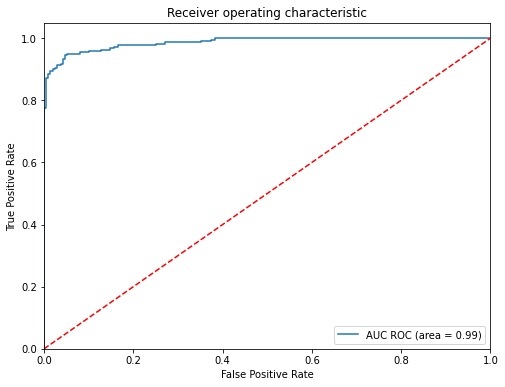

In [213]:
predict_gridsearch_result(df_data_1,.20, 10, 1,'precision_score')
plt.savefig("No_outlier_no_corr_PCA_AUC_ROC_1.png")
plt.show()

(1717, 15)
(430, 15)
(1717,)
(430,)
PCA
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


0.9822978207708455
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=10, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=18,
                                        min_samples_split=132,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
----------

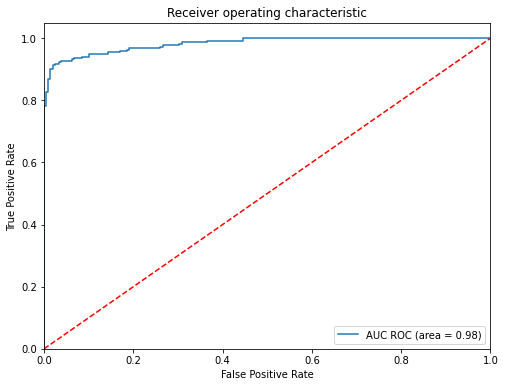

In [214]:
predict_gridsearch_result(df_data_1,.20, 10, 1, 'recall_score')
plt.savefig("No_outlier_no_corr_PCA_AUC_ROC_2.png")
plt.show()

(1717, 15)
(430, 15)
(1717,)
(430,)
PCA
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished


0.93900538856067
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=2, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=9,
                                        min_samples_split=442,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
-------------------

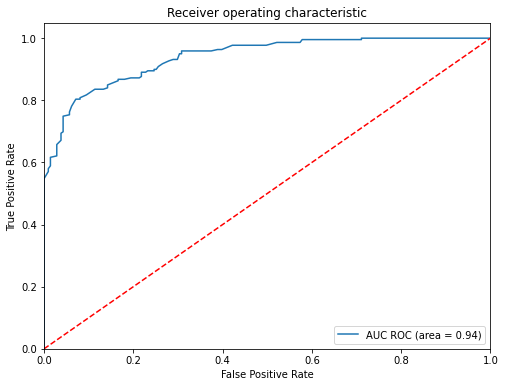

In [215]:
predict_gridsearch_result(df_data_1,.20, 10, 1, 'accuracy_score')
plt.savefig("No_outlier_no_corr_PCA_AUC_ROC_3.png")
plt.show()

(1717, 15)
(430, 15)
(1717,)
(430,)
PCA
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.6s finished


0.9657858858663897
 START BEST MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=4, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=472,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)
----------------

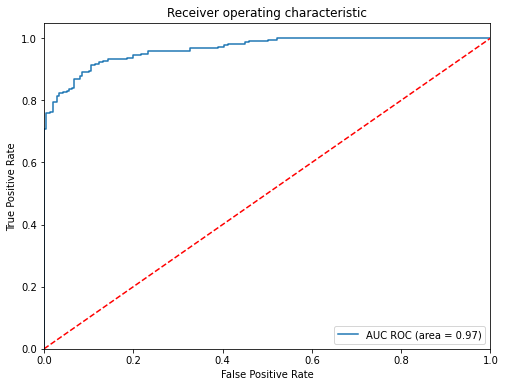

In [216]:
predict_gridsearch_result(df_data_1,.20, 10, 1, 'f1_score')
plt.savefig("No_outlier_no_corr_PCA_AUC_ROC_4.png")
plt.show()

No outlier, no high correlation and PCA

- precision score
 
 accuracy 			- 	0.9701
 
 precision			-	0.9707
 
 recall				-	0.9086
 
 F1 score			-	0.9386
 
 AUC ROC score		-	0.9861
 
 Fit time			-	1.22
 
**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=16, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=6,
                                        min_samples_split=82,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**

										
- recall score
 
 accuracy 			- 	0.9178
 
 precision			-	0.9663
 
 recall				-	0.9178
 
 F1 score			-	0.9414
 
 AUC ROC score		-	0.9823
 
 Fit time			-	1.56
 

**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=10, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=18,
                                        min_samples_split=132,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**

										
- accuracy score
 
 accuracy 			- 	0.8488
 
 precision			-	0.8473
 
 recall				-	0.8630
 
 F1 score			-	0.8532
 
 AUC ROC score		-	0.9390
 
 Fit time			-	0.014
 

**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=2, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=9,
                                        min_samples_split=442,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**
										
- f1 score
 
 accuracy 			- 	0.8986
 
 precision			-	0.9069
 
 recall				-	0.8904
 
 F1 score			-	0.8986
 
 AUC ROC score		-	0.9657
 
 Fit time			-	0.403
 
 
**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=4, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=472,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**
										
										

**So, based on above statistics, model based on precision score is best**						

<a id = Section1531></a>
### 15.3.1 Observation from parametrized models performance

From all the above combinations tested with different parameters, below 2 models seems to have best results on overall basis


- No outlier - PCA on 10 compoents  - scoring on f1 score

 accuracy 			- 	0.9631
 
 precision			-	0.9720
 
 recall				-	0.954
 
 F1 score			-	0.9631
 
 AUC ROC score		-	0.9901
 
 Fit time			-	0.1066
 
 
**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=10, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=10,
                                        min_samples_split=112,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**
										
										

- No outlier and high correlation columns - SelectKBest on 15 features - scoring on accuracy score


 accuracy 			- 	0.9744
 
 precision			-	0.9905
 
 recall				-	0.9589
 
 F1 score			-	0.9744
 
 AUC ROC score		-	0.9946
 
 Fit time			-	0.123
 

**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=16, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=42,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False)**
										

Further, if further shortlist, then the model on dataset with no outlier and high correlation columns - SelectKBest on 15 features - scoring on accuracy score seems to be better



<a id = Section154></a>
## 15.4 Comparing models performance - baseline and parametrized models

On further comparing the best models from default and from Grid search based modelling - both on data with no outlier and highly correlated columns and SelectKBest with 15 features

 - Default baseline  model - SVC
 
	F1 score- .977

	Test accuracy - .976

	Recall - .977

	Precison - .977

	Difference in test and train accuracy - -0.34


**MinMaxScaler(copy=True, feature_range=(0, 1)**

**SelectKBest(k=15,score_func=<function chi2 at 0x7f22d9565158>)**

**SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf', max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001, verbose=False)**


 - Parametrized model  - RandomForestClassifier
 
 accuracy 			- 	0.9744
 
 precision			-	0.9905
 
 recall				-	0.9589
 
 F1 score			-	0.9744
 
 AUC ROC score		-	0.9946
 
 Fit time			-	0.123
 
 
**MinMaxScaler(copy=True, feature_range=(0, 1)**

**SelectKBest(k=15,score_func=<function chi2 at 0x7f22d9565158>)**

**RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='entropy', max_depth=16, max_features='sqrt', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=42, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None, oob_score=False, random_state=0, verbose=0, warm_start=False)**


So, we can create pipeline with the above 2 models and use it for the future data.

<a id = Section155></a>
## 15.5 Implementation of the best model pipeline

In [0]:
def create_save_model(df, n):
  le=LabelEncoder()
  df['label']=le.fit_transform(df['label'])
  y=df['label']

  X=df.drop('label', axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0) 
  print(X_train.shape)
  print(X_test.shape)
  print(y_train.shape)
  print(y_test.shape)

  scaler=MinMaxScaler()
  X_std_train=scaler.fit_transform(X_train)
  X_std_test=scaler.transform(X_test)

  fs=SelectKBest(score_func=chi2, k=n)
  X_new=fs.fit_transform(X_std_train, y_train)
  X_std_test=fs.transform(X_std_test)

  pipe=Pipeline(steps=[('classifier', SVC())])

  param_grid=[{
      'classifier':[SVC()],
      'classifier__C' : [1.0],
      'classifier__break_ties' : [False],
      'classifier__cache_size' : [200],
      'classifier__class_weight' : [None],
      'classifier__coef0':[0.0],
      'classifier__decision_function_shape':['ovr'],
      'classifier__degree':[3],
      'classifier__gamma':['scale'],
      'classifier__kernel':['rbf'],
      'classifier__max_iter':[-1],
      'classifier__probability':[True],
      'classifier__shrinking':[True],
      'classifier__tol':[0.001],
      'classifier__verbose':[False],
      'classifier__random_state':[0]
  },
  {
      'classifier':[RandomForestClassifier()],
      'classifier__bootstrap':[True],
      'classifier__ccp_alpha':[0.0],
			'classifier__class_weight' : [None],
      'classifier__criterion':['entropy'],
      'classifier__max_depth':[16],
			'classifier__max_leaf_nodes':[None],
			'classifier__max_samples':[None],
			'classifier__min_impurity_decrease':[0.0],
			'classifier__min_impurity_split':[None],
      'classifier__min_samples_split':[42],
      'classifier__min_samples_leaf':[1],
      'classifier__max_features':['sqrt'],
			'classifier__min_weight_fraction_leaf':[0.0],
			'classifier__n_estimators':[10],
			'classifier__n_jobs':[None],
			'classifier__oob_score':[False],
      'classifier__random_state':[0],
			'classifier__verbose':[0],
			'classifier__warm_start':[False]
  }
  ]

  clf = RandomizedSearchCV(pipe, n_iter=10, param_distributions = param_grid, cv =10, verbose=True, n_jobs=-1, scoring='accuracy')
  best_clf = clf.fit(X_new, y_train)

  y_pred=best_clf.predict(X_std_test)
  y_pred_proba = best_clf.predict_proba(X_std_test)

  print("Predict value :", y_pred);
  preds = y_pred_proba[:,1]
  fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
  roc_auc = metrics.auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label='AUC ROC (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")

  print(" START MODEL STATS :\n")
  print("Best estimator : \n", best_clf.best_estimator_)
  print("-----------------------------------------")
  print('Model accuracy is :',best_clf.score(X_std_test, y_test))
  print("-----------------------------------------")
  print('Best parameters : \n', best_clf.best_estimator_.get_params())
  print("-----------------------------------------")
  print('Recall : ', metrics.recall_score(y_test, y_pred))
  print("-----------------------------------------")
  print('Precison : ', metrics.precision_score(y_test, y_pred))
  print("-----------------------------------------")
  print('F1 score : ', metrics.f1_score(y_test, y_pred))
  print("-----------------------------------------")
  print('Mean fit Time  : ', best_clf.cv_results_['mean_fit_time'].mean())
  print("-----------------------------------------")
  print('AUC ROC score  : ', roc_auc)
  print("-----------------------------------------")
  print("-----------------------------------------")
  print("Confusion Matrix:\n", pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns=['male','female'], index=['male','female']))
  print("-----------------------------------------")
  print("-----------------------------------------")
  print('Classfication Report : \n', metrics.classification_report(y_test, y_pred))
  print("-----------------------------------------")
  print("-----------------------------------------")
  print(" END MODEL STATS :\n")

  return best_clf


(1717, 15)
(430, 15)
(1717,)
(430,)
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.3s finished


Predict value : [0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0
 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0
 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0
 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1
 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0
 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1
 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0
 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1
 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0
 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1]
 START MODEL STATS :

Best estimator : 
 Pipeline(memory=None,
         steps=[('classifier',
                 

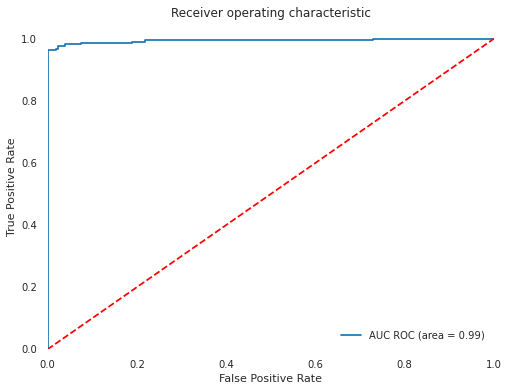

In [110]:
best_mlpipe=create_save_model(df_data_1, 15)
plt.savefig("Final_AUC_ROC_curve.png")
plt.show()

In [112]:
dump_file = 'best_cls_pipeline.pkl'
joblib.dump(best_mlpipe, dump_file, compress=1)
print('\nSaved pipeline to file: %s' , dump_file)


Saved pipeline to file: %s best_cls_pipeline.pkl


So, the pipeline is created and saved to the pickle file for later use

Also observed with the final pipeline of the best model, we get the following stats

- Model accuracy  : 0.9767441860465116

- Recall :  0.9634703196347032

- Precison :  0.9906103286384976

- F1 score :  0.9768518518518519

- Mean fit Time  :  0.11973000764846803

- AUC ROC score  :  0.9939838559587959


So, the model has high values for recall and precision along with F1 score, so both the classes prediction accuracy is acceptable

Further from the below matrix, the incorrect predicted value count for both the classes  - male and female is less, so the model has performed as per expectation.

**Confusion Matrix:**

Predict | male | female
---|---|---
Actual| | |
male | 209|2
female|8|211


Also, from  the below report, recall and precision for the both classes are 96 and 99 along with F1 score of 98, so the result seems fine.

**Classfication Report :**

               precision    recall  f1-score   support

           0       0.96      0.99      0.98       211

           1       0.99      0.96      0.98       219

    accuracy                           0.98       430

    macro avg       0.98      0.98     0.98       430

    weighted avg    0.98      0.98     0.98       430

<a id = Section16></a>
# 16. Conclusion

- SVC seems to be performed marginally better than RandomForestClassifier, so both the models with best analyzed parameter configuration are added in the final pipeline that can be used for future data.

- Also, the dataset without outliers and with all the columns that have multicollinarity (90% correlation) removed performed better than the dataset with only outliers removed.

- SelectKBest to deduce important feature performed better than PCA for dimensionality reduction.

- Also, sclaing needed before feeding the data as few columns values are at different scales as compared to remaining dataset.

- The acceptable values of accuracy,precision and score determines model has performed as expected and further validation can be done on future data.